# Autism vs Autism Spectrum RSV Analysis Part 1

This notebook is Part 1 of the analysis of Google searches in different languages for "Autism" and "Autism spectrum disorder".
Part 1 focuses on:
- data cleaning
- df merging

## Reading data in

I downloaded a series of google trends data in order to compare the interest of people for "autism spectrum disroder" and "autism" in different languages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


For the convenience of handling multiple data files, I createed a function, that will help me read in the data more easily

In [2]:
def scrape_filenames():
  '''
  lists the names of uploaded files
  cleans them and returns a list of file names
  '''
  string_list = !ls
  file_list = []

  for s in string_list:
    s = s.replace('  ', ',').replace('    ', ',').replace('\t', ',')
    file_list.extend(s.split(','))

  file_list = [s for s in file_list if len(s)>0]
  file_list = [s.strip() for s in file_list]

  return file_list


In [3]:
file_list = scrape_filenames()

_short.csv - contains RSV data for "Autism" in a given language
-long.csv - contain RSV data dfor "Autism Spectrum Disorder" in a given language
I used wikipedia to search for the translations of both terms

In [4]:
print(file_list)

['afrikaans_short.csv', 'arabic_long.csv', 'autism_language.ipynb', 'bulgarian_long.csv', 'chineeshk_long.csv', 'chinees_long.csv', 'czech_long.csv', 'dutch_long.csv', 'english_long.csv', 'english_short.csv', 'finnish_long.csv', 'french_long.csv', 'german_short.csv', 'hebrew_long.csv', 'indonesian_long.csv', 'japanese_long.csv', 'korean_long.csv', 'korean_short.csv', 'kroatian_long.csv', 'norwegian_long.csv', 'notebook.ipynb', 'persian_long.csv', 'polish_long.csv', 'polish_short.csv', 'portugese_long.csv', 'portugese_short.csv', 'russian_long.csv', 'russian_short.csv', 'slovaks_long.csv', 'spanish_long.csv', 'swahili_short.csv', 'turkish_long.csv', 'vietnamese_long.csv']


## Cleaning and merging individual languages

In [5]:
def read_batch(file_list):
  '''
  takes a list of file names
  joins them into a path
  and returns the data frame
  '''

  all_languages = pd.read_csv('arabic_long.csv', skiprows = 2, parse_dates=['Miesiąc'])
  language_names = []
  for name in file_list:
    path = name
    if (path == 'autism_language.ipynb')| (path == 'notebook.ipynb'):
      continue
    col_name = name.split('.')[0]
    df = pd.read_csv(path, skiprows = 2, parse_dates=['Miesiąc'])
    df = df.rename(columns = {df.columns[1]:col_name})
    all_languages = all_languages.merge(df, how='outer', on='Miesiąc')

  all_languages = all_languages.rename(columns = {'Miesiąc': 'date'})
  all_languages.drop(columns = 'طيف التوحد: (Cały świat)', inplace = True)

  return all_languages

In [6]:
df_lang = read_batch(file_list)
df_lang.head()

,date,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,english_long,english_short,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long
0,2004-01-01,0,0,0,0,38,0,0,16,52,0,0,59,71,0,0,0,10,75,84,0,36,16,0,13,0,7,100,0,0,0,100
1,2004-02-01,0,0,100,0,43,0,56,8,57,0,0,68,30,65,0,0,0,0,0,0,0,16,0,13,0,0,0,0,0,0,0
2,2004-03-01,98,100,0,0,72,0,0,19,57,0,0,62,54,0,0,0,0,100,0,0,0,26,0,16,0,0,0,0,0,0,0
3,2004-04-01,75,0,0,0,100,0,0,19,66,0,100,51,41,0,0,0,12,0,0,0,0,38,0,17,0,0,0,0,100,0,0
4,2004-05-01,0,0,0,0,96,0,0,24,58,0,93,57,53,0,0,0,0,0,0,0,0,48,0,17,71,0,0,0,0,0,0


In [7]:
df_lang.set_index('date', inplace=True)

In [8]:
# visuals and statistics for english short
english_short = df_lang['english_short']
english_long = df_lang['english_long']


In [9]:
english_combo = (english_short + english_long)/2

In [10]:
print(english_combo)

date
2004-01-01    34.0
2004-02-01    32.5
2004-03-01    38.0
2004-04-01    42.5
2004-05-01    41.0
              ... 
2023-06-01    75.0
2023-07-01    71.0
2023-08-01    67.5
2023-09-01    72.0
2023-10-01    75.5
Length: 238, dtype: float64


In [11]:
df_lang.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01'],
              dtype='datetime64[ns]', name='date', length=238, freq=None)

In [12]:
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
import numpy as np

## Visual analysis of the data for individual languages

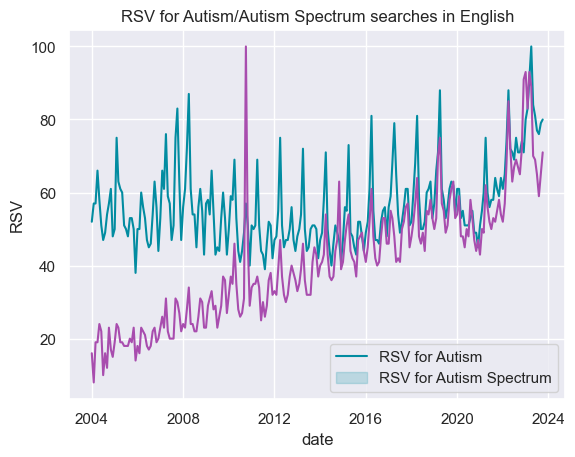

<Figure size 2000x500 with 0 Axes>

In [13]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

short = sns.lineplot(english_short, color = '#028ca1' ).set(title = 'RSV for Autism/Autism Spectrum searches in English')
long = sns.lineplot(english_long, color = '#a84dae').set(ylabel= 'RSV')


plt.legend(labels= ['RSV for Autism','RSV for Autism Spectrum'])
plt.show()
plt.savefig('RSV comparison 2014-2023 for English-short vs long')

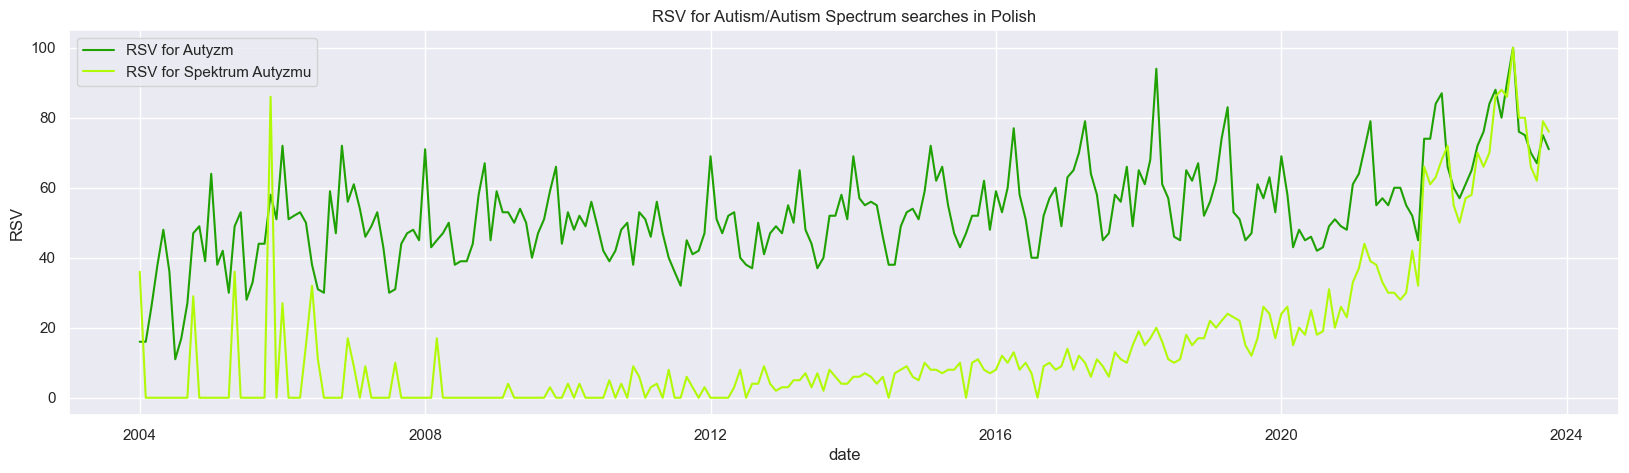

<Figure size 2000x500 with 0 Axes>

In [14]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

sns.lineplot(x=df_lang.index, y =df_lang['polish_short'], color = '#1fa102',label ='RSV for Autyzm').set(title = 'RSV for Autism/Autism Spectrum searches in Polish' )
sns.lineplot(x=df_lang.index, y =df_lang['polish_long'], color = '#b1fa07',label = 'RSV for Spektrum Autyzmu'   ).set(ylabel= 'RSV')

plt.show()
plt.savefig('RSV comparison 2014-2023 for Polish-short vs long')

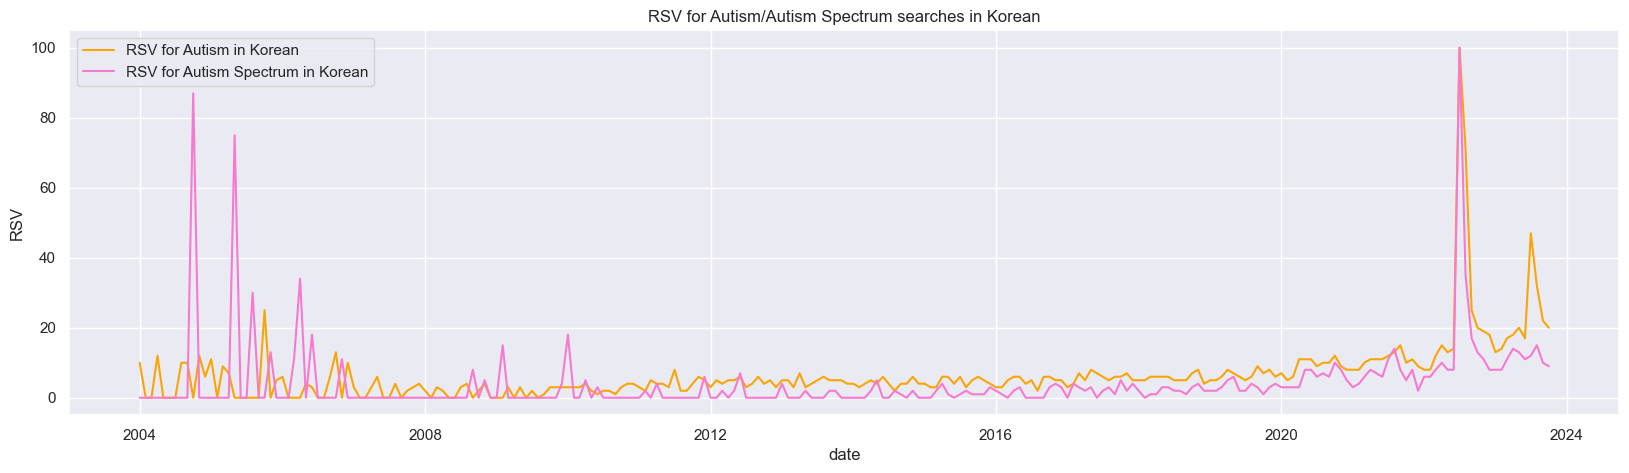

<Figure size 2000x500 with 0 Axes>

In [15]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

sns.lineplot(x=df_lang.index, y =df_lang['korean_short'], color = '#faa507',label ='RSV for Autism in Korean').set(title = 'RSV for Autism/Autism Spectrum searches in Korean' )
sns.lineplot(x=df_lang.index, y =df_lang['korean_long'], color = '#f57ad0',label = 'RSV for Autism Spectrum in Korean').set(ylabel= 'RSV')

plt.show()
plt.savefig('RSV comparison 2014-2023 for Korean-short vs long')

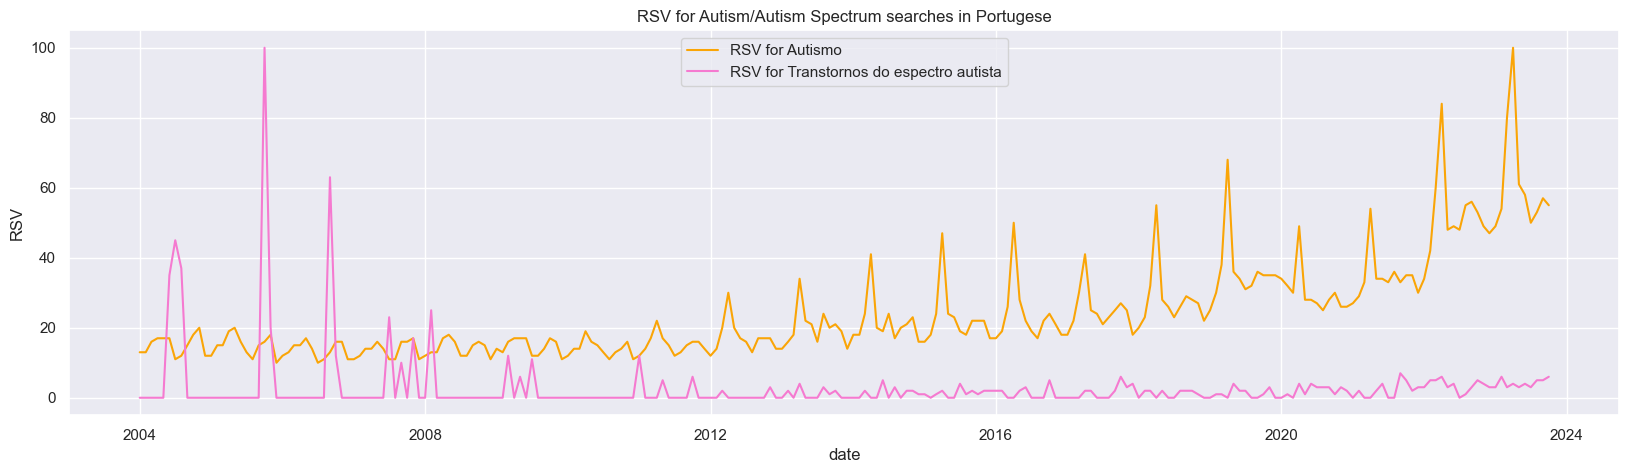

<Figure size 2000x500 with 0 Axes>

In [16]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

sns.lineplot(x=df_lang.index, y =df_lang['portugese_short'], color = '#faa507',label ='RSV for Autismo'  ).set(title = 'RSV for Autism/Autism Spectrum searches in Portugese' )
sns.lineplot(x=df_lang.index, y =df_lang['portugese_long'], color = '#f57ad0',label = 'RSV for Transtornos do espectro autista').set(ylabel= 'RSV')

plt.show()
plt.savefig('RSV comparison 2014-2023 for Portugese-short vs long')

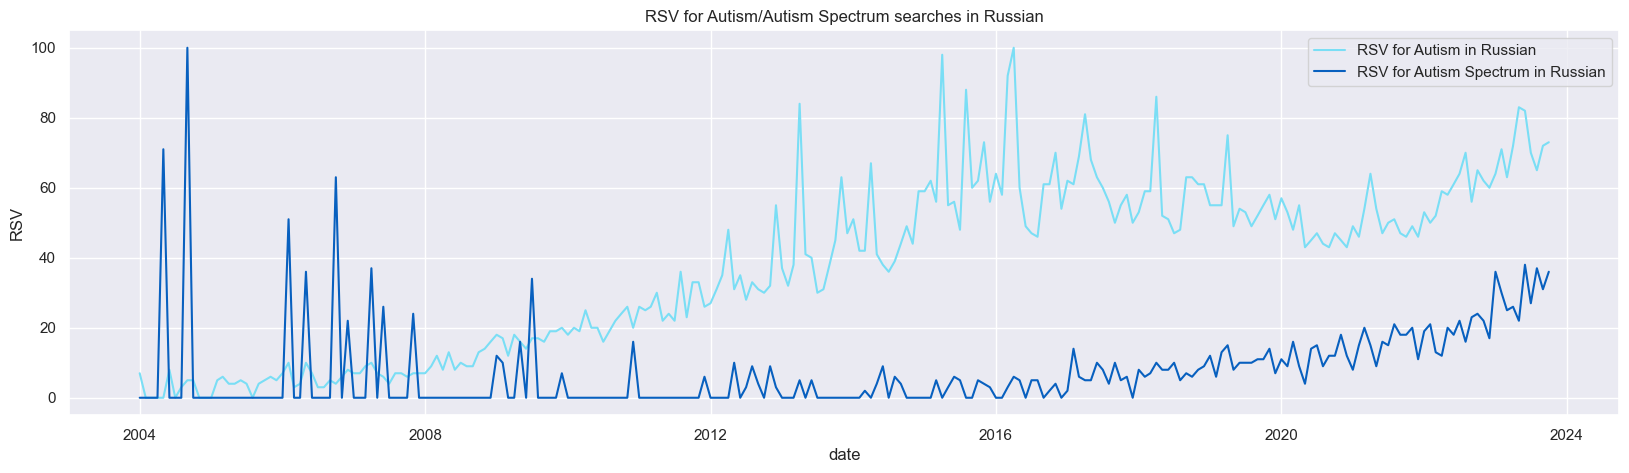

<Figure size 2000x500 with 0 Axes>

In [17]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

sns.lineplot(x=df_lang.index, y =df_lang['russian_short'], color = '#7adef5',label ='RSV for Autism in Russian'  ).set(title = 'RSV for Autism/Autism Spectrum searches in Russian' )
sns.lineplot(x=df_lang.index, y =df_lang['russian_long'], color = '#0860bf',label = 'RSV for Autism Spectrum in Russian'   ).set(ylabel= 'RSV')

plt.show()
plt.savefig('RSV comparison 2014-2023 for Russian-short vs long')

In [18]:
df_lang.dtypes

afrikaans_short    int64
arabic_long        int64
bulgarian_long     int64
chineeshk_long     int64
chinees_long       int64
czech_long         int64
dutch_long         int64
english_long       int64
english_short      int64
finnish_long       int64
french_long        int64
german_short       int64
hebrew_long        int64
indonesian_long    int64
japanese_long      int64
korean_long        int64
korean_short       int64
kroatian_long      int64
norwegian_long     int64
persian_long       int64
polish_long        int64
polish_short       int64
portugese_long     int64
portugese_short    int64
russian_long       int64
russian_short      int64
slovaks_long       int64
spanish_long       int64
swahili_short      int64
turkish_long       int64
vietnamese_long    int64
dtype: object

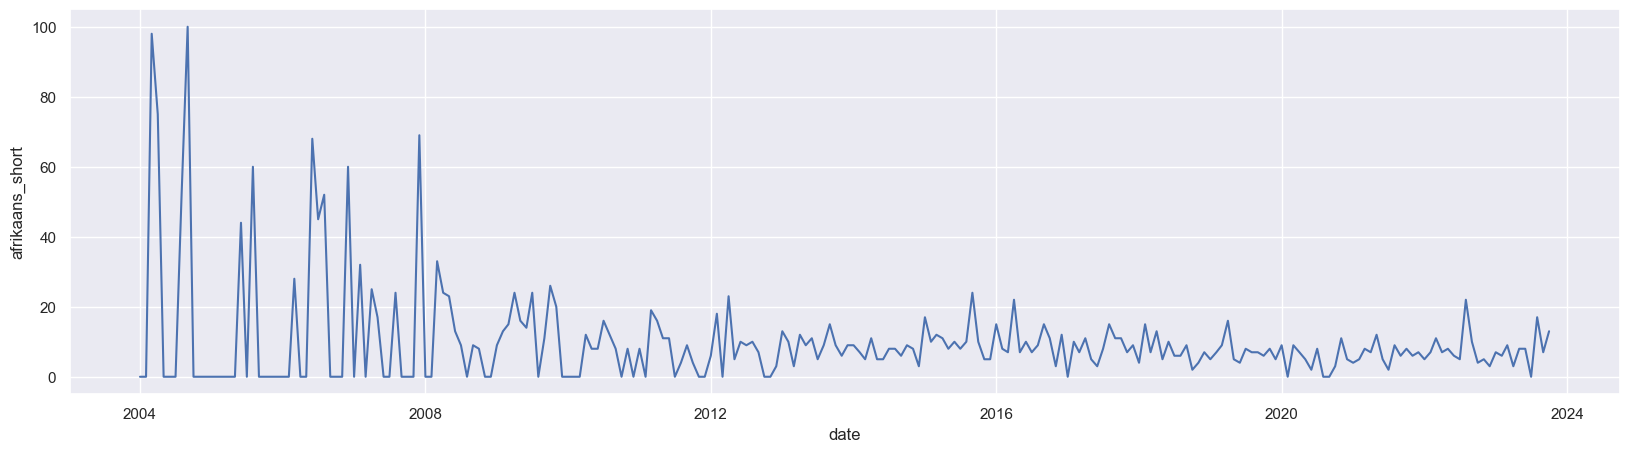

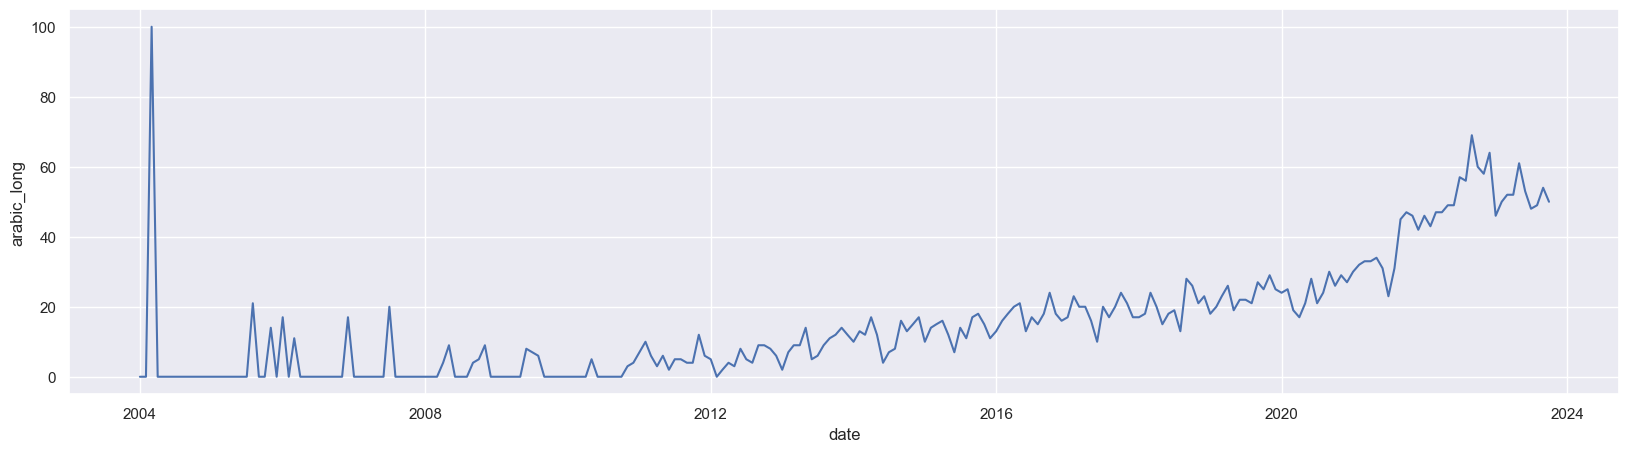

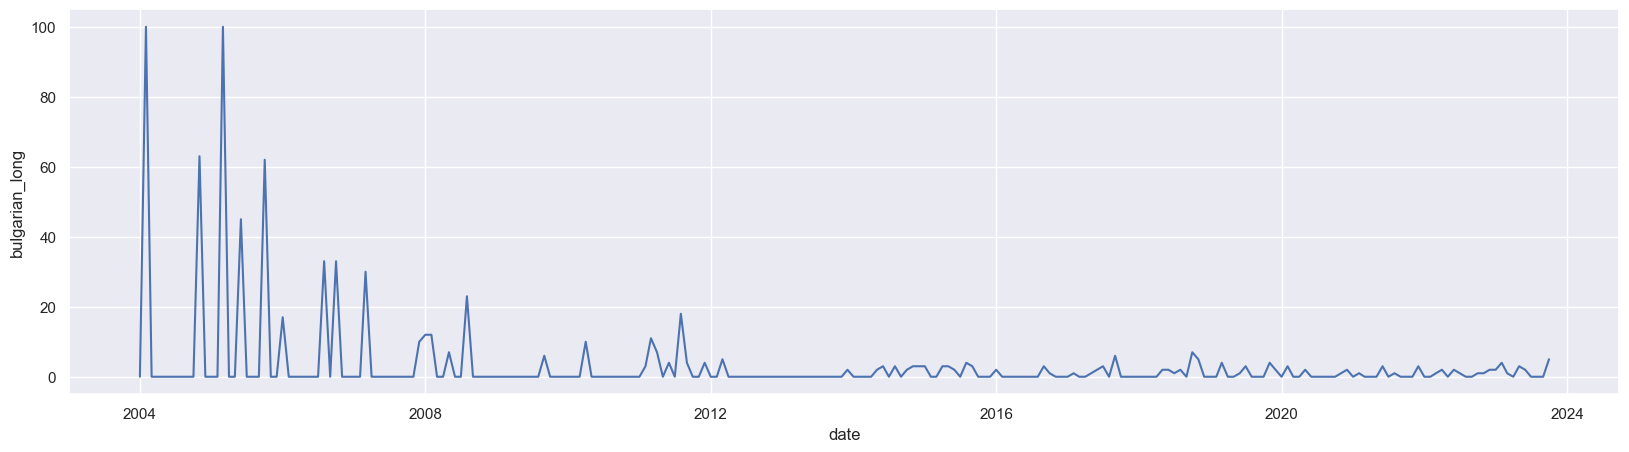

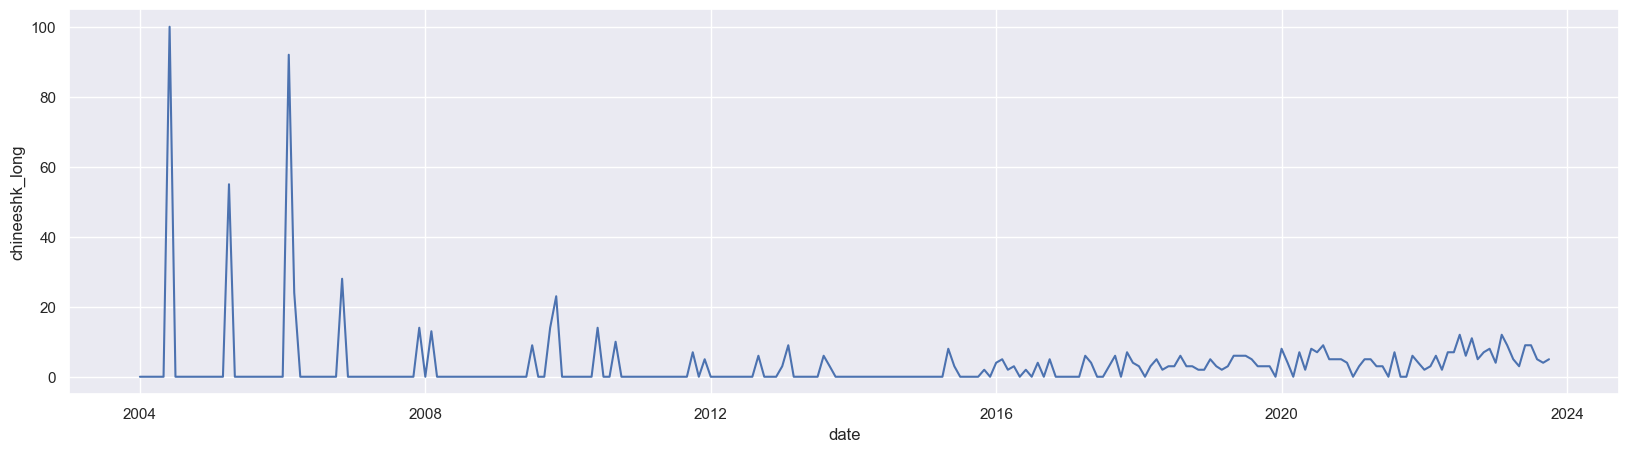

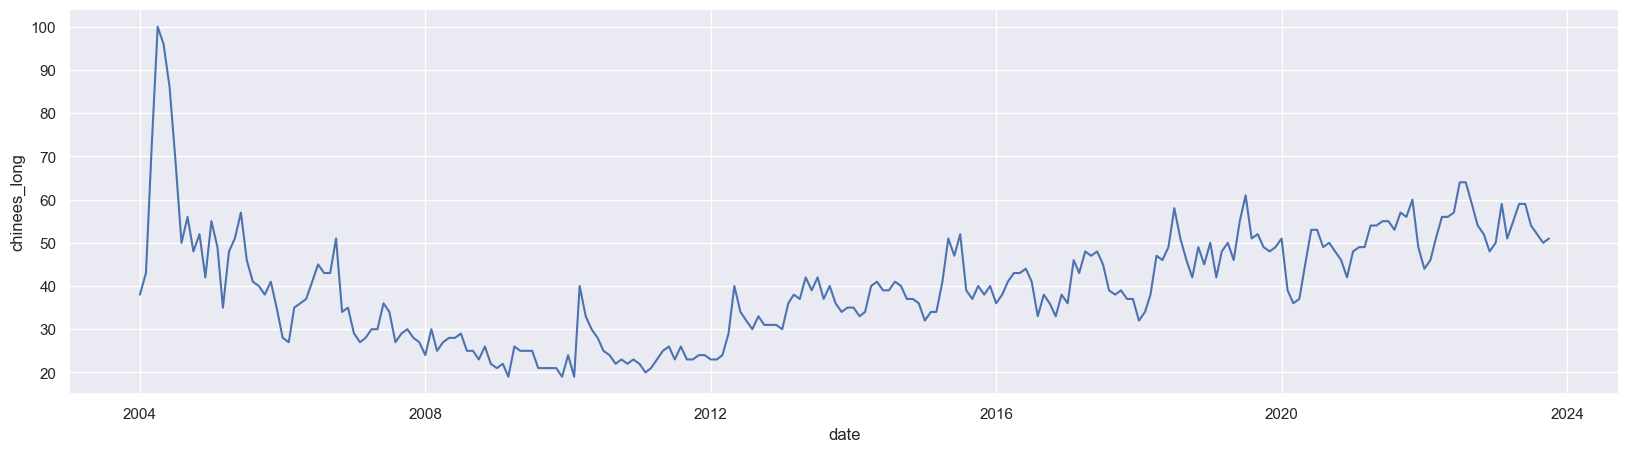

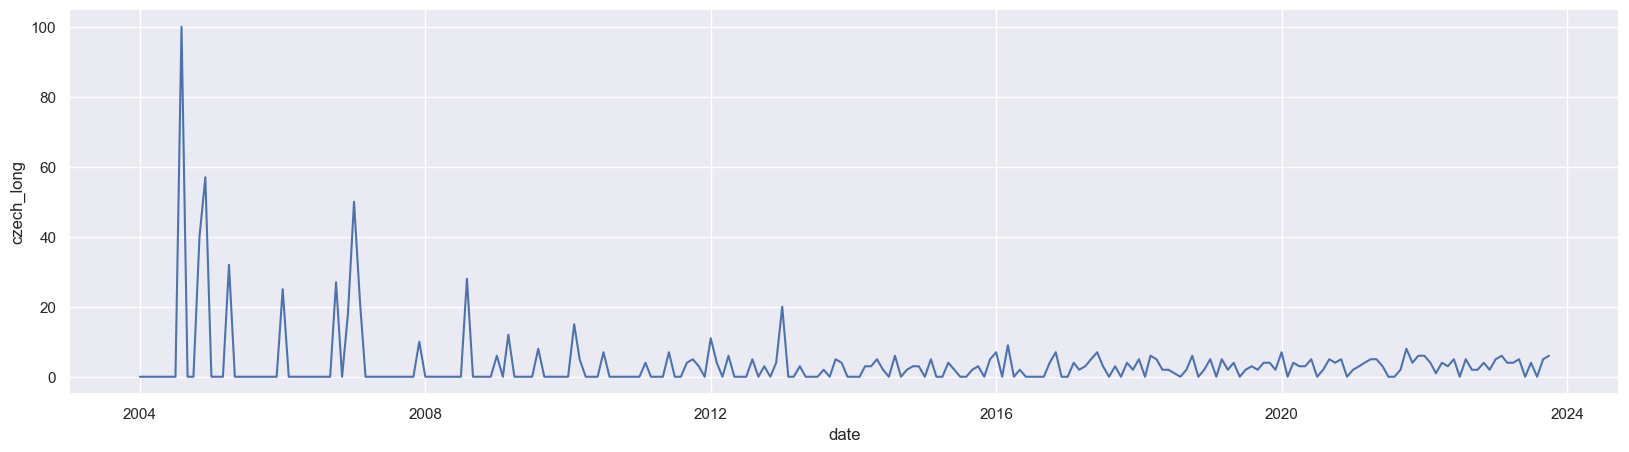

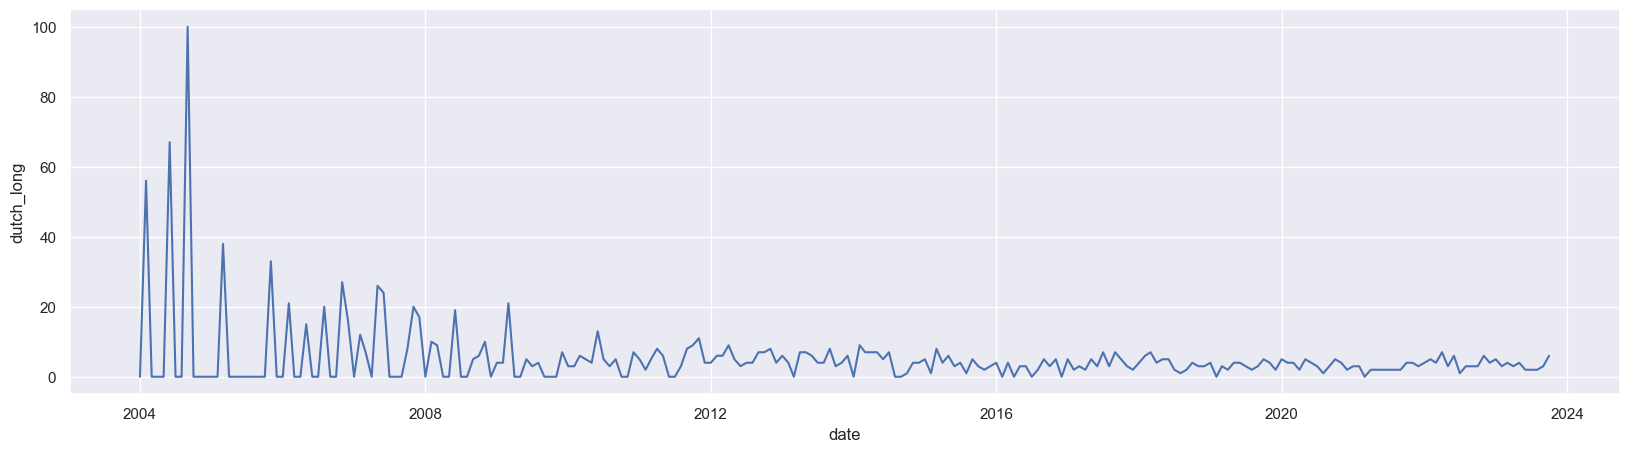

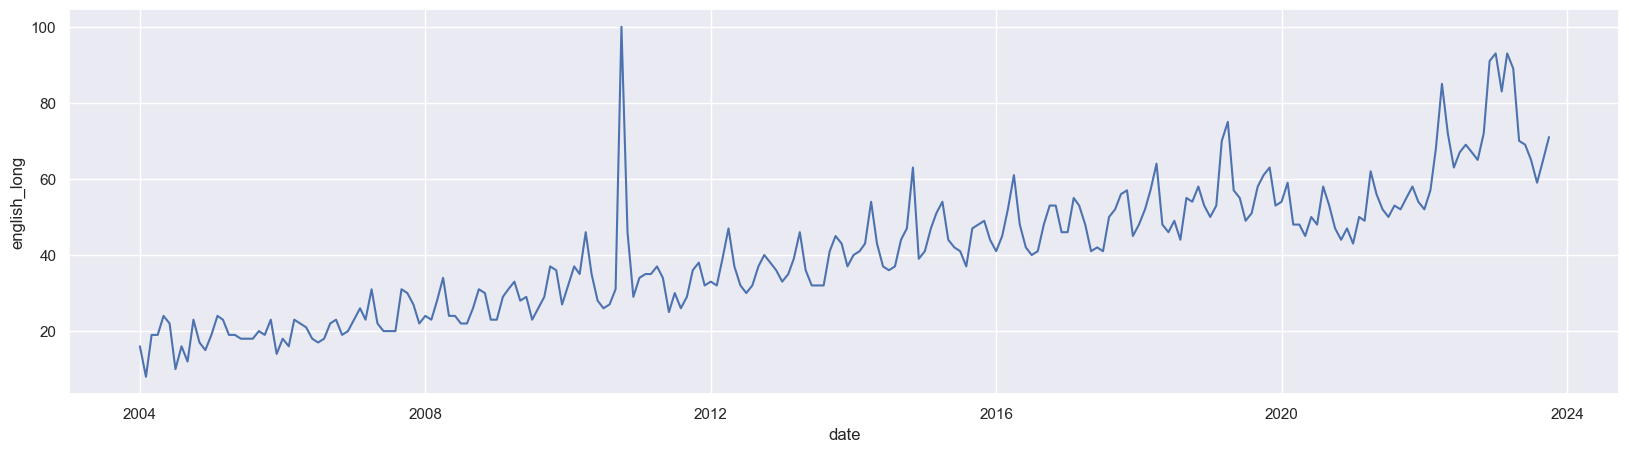

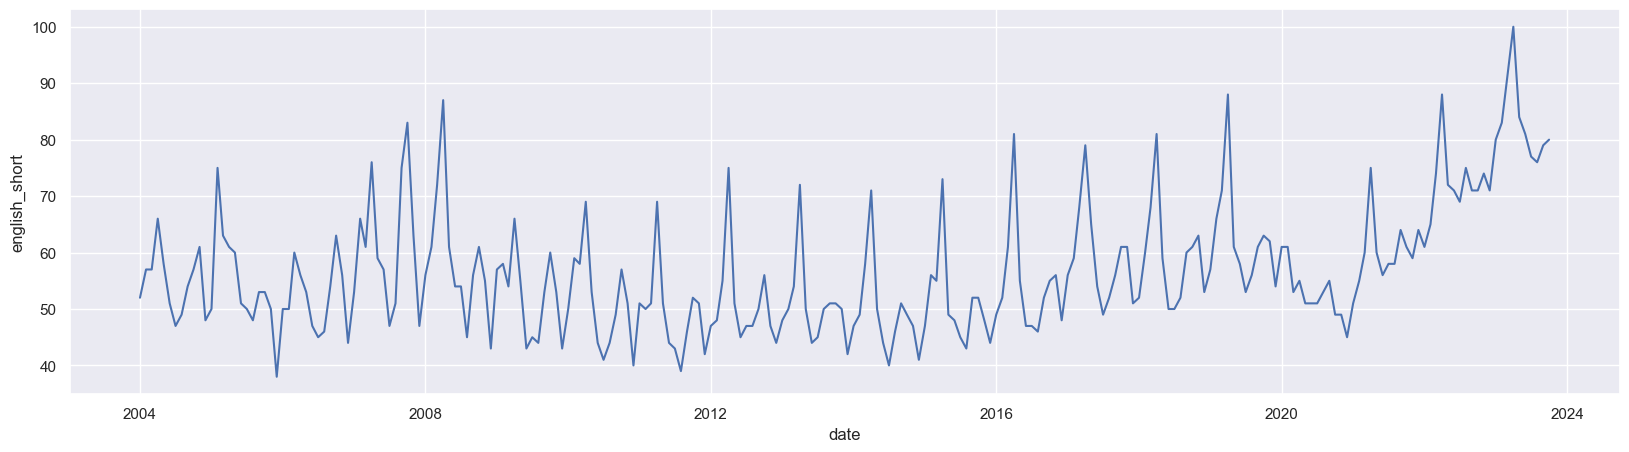

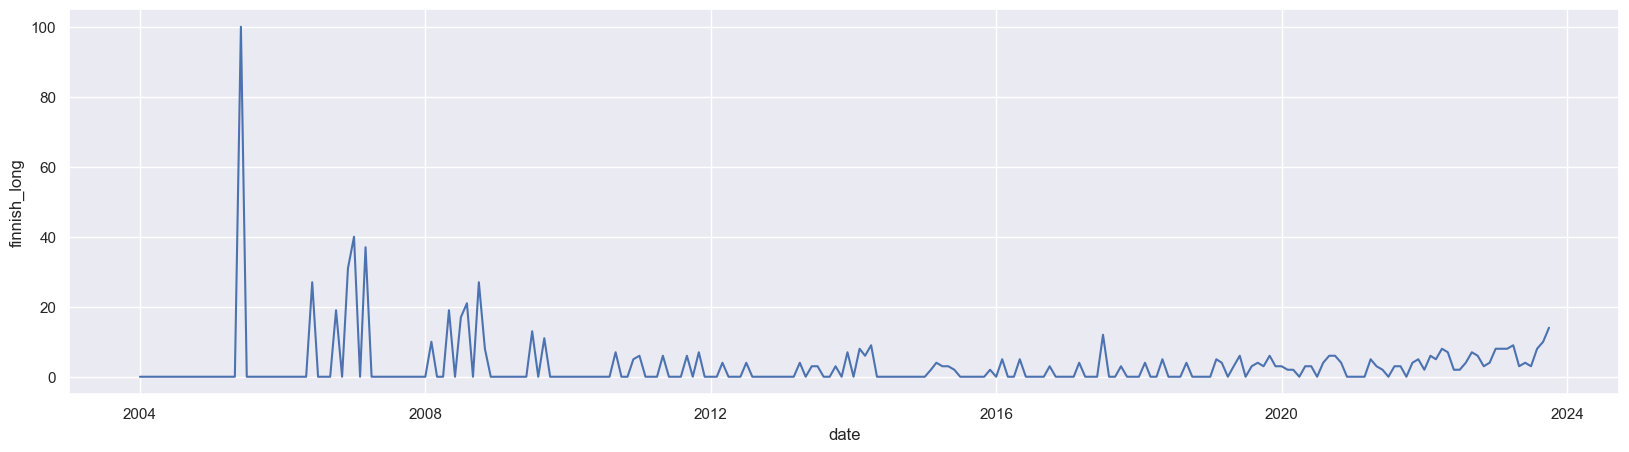

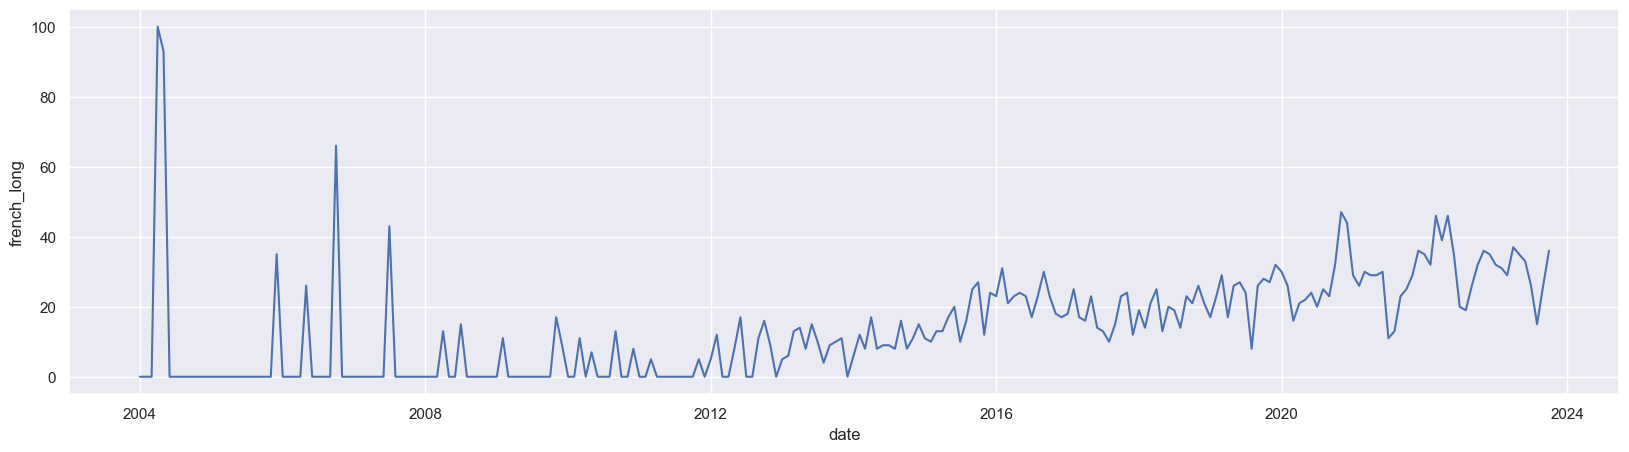

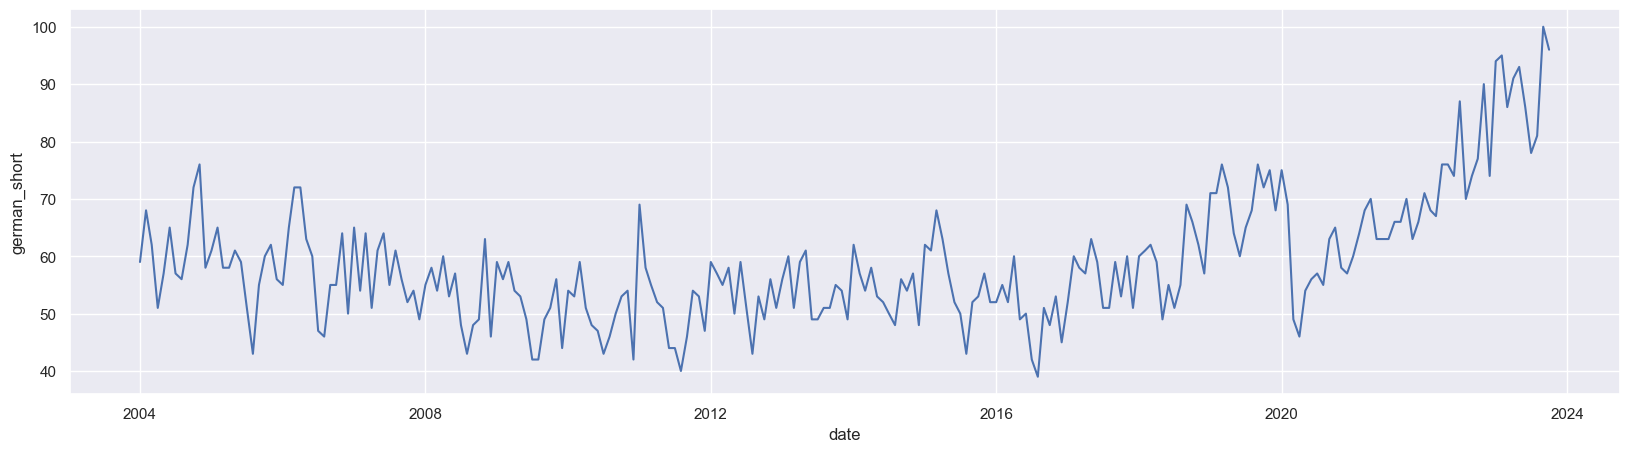

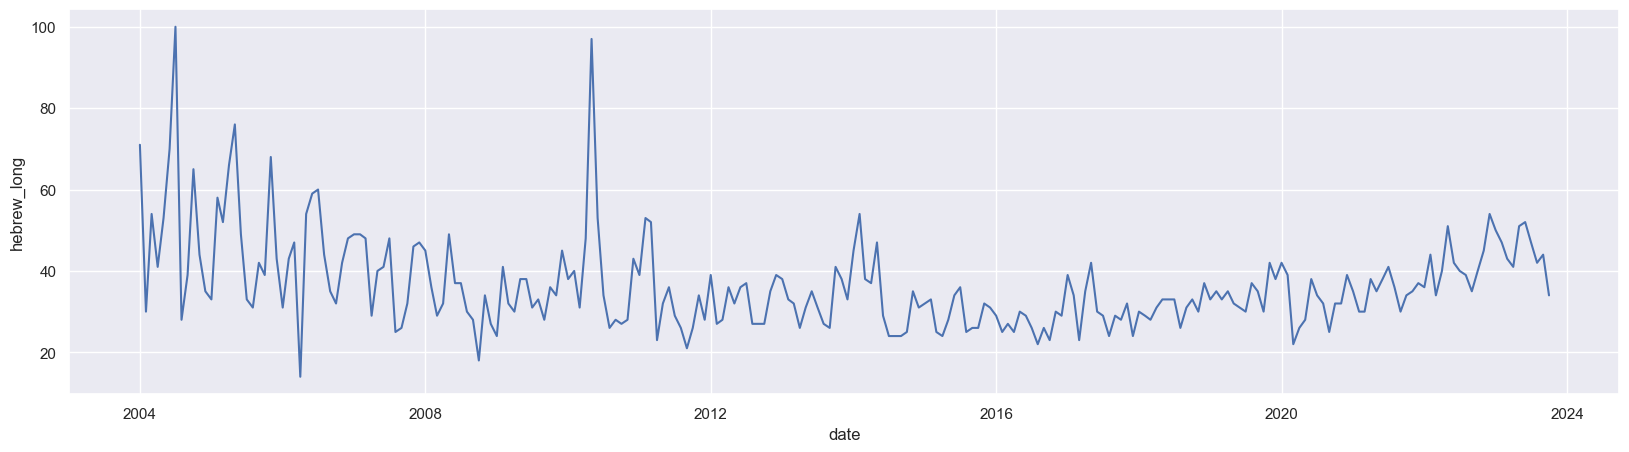

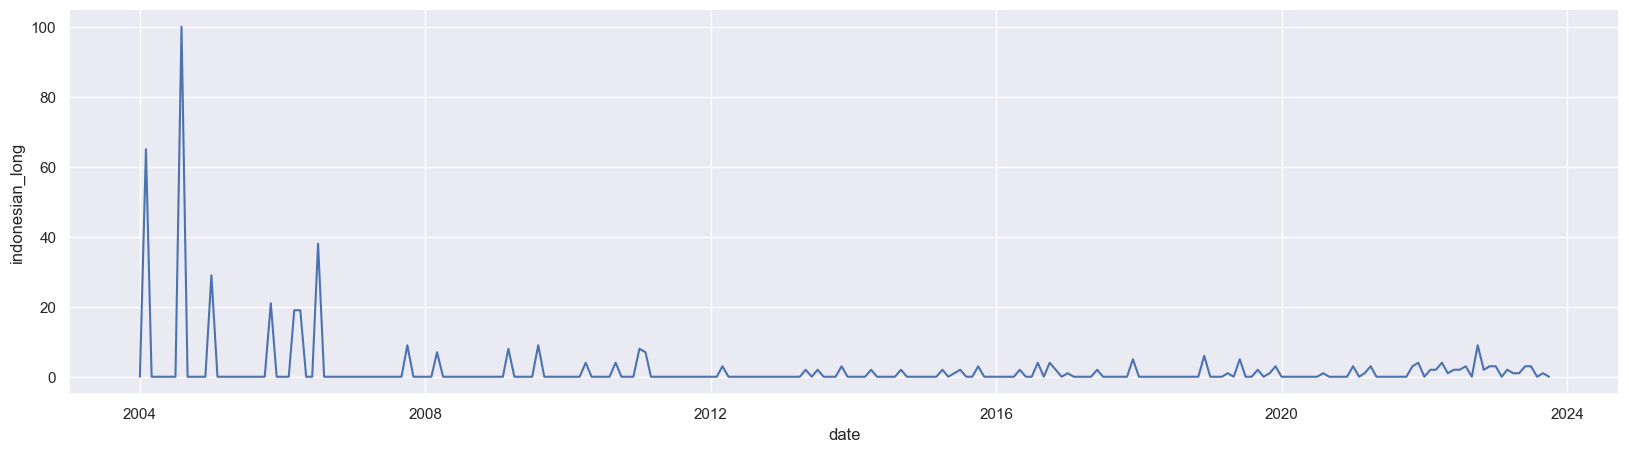

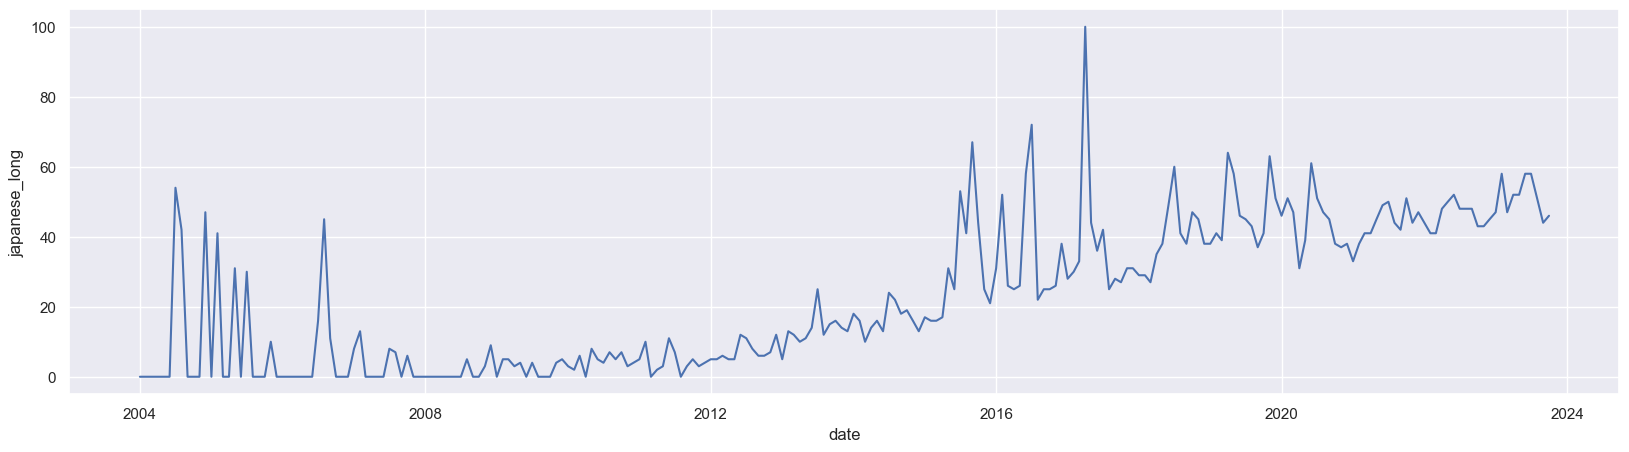

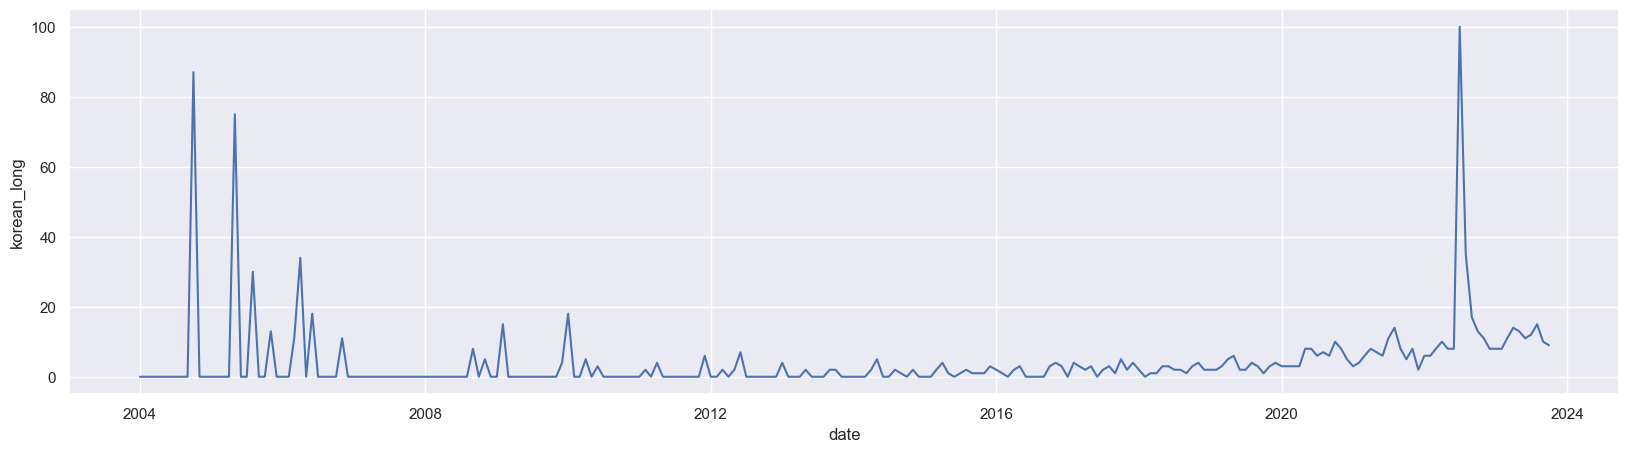

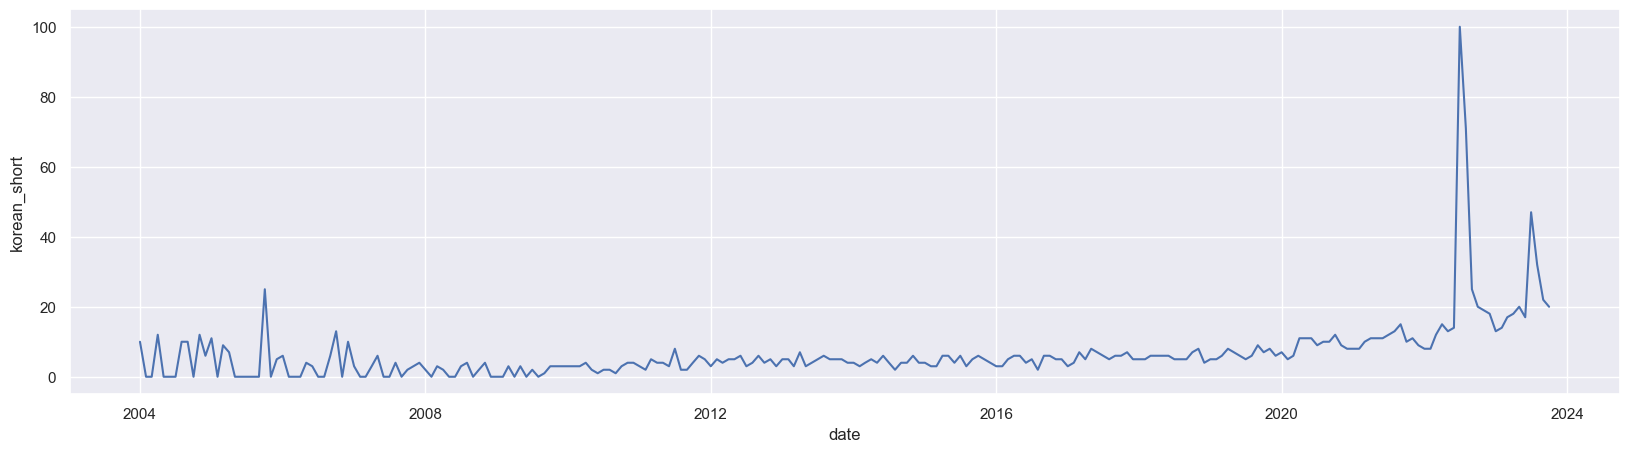

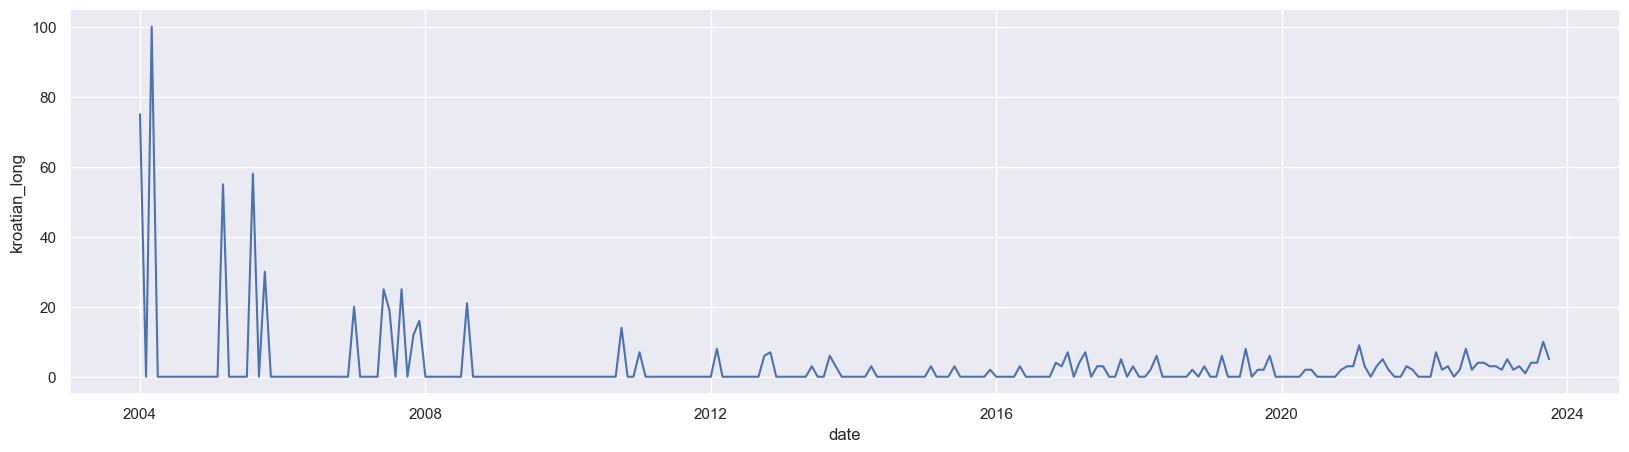

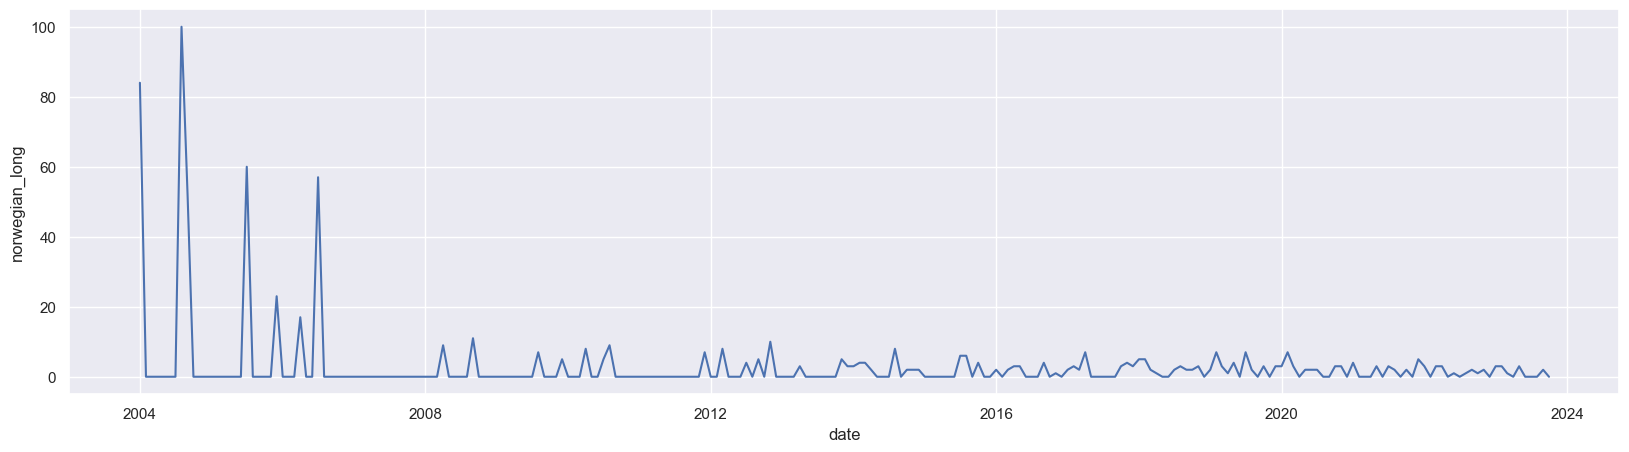

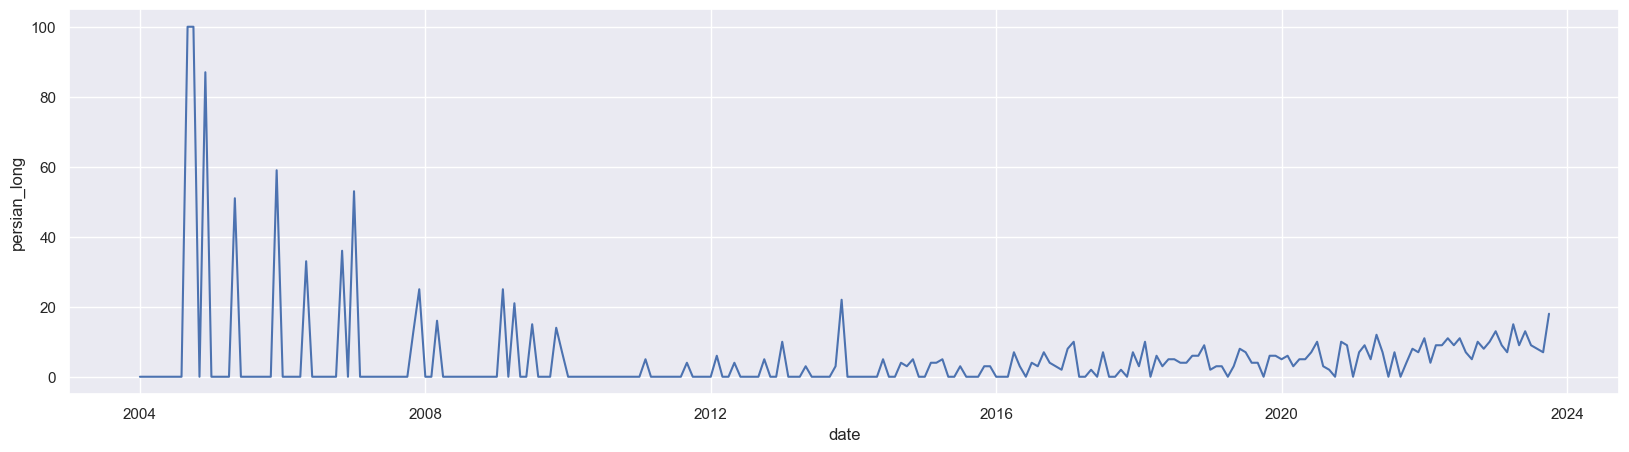

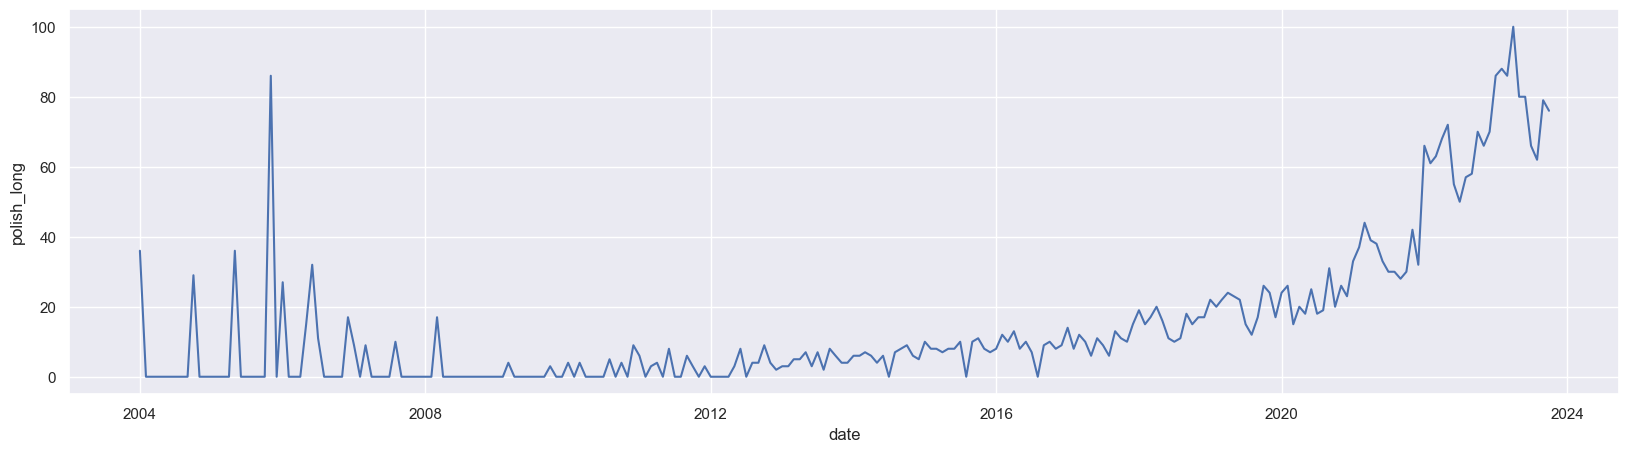

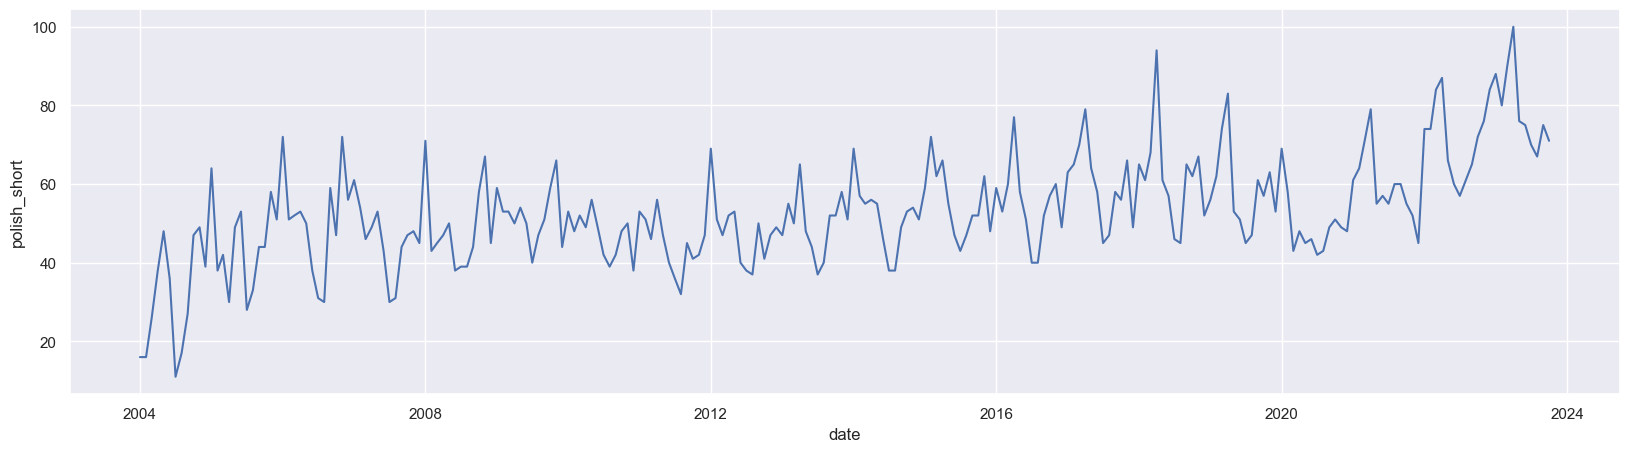

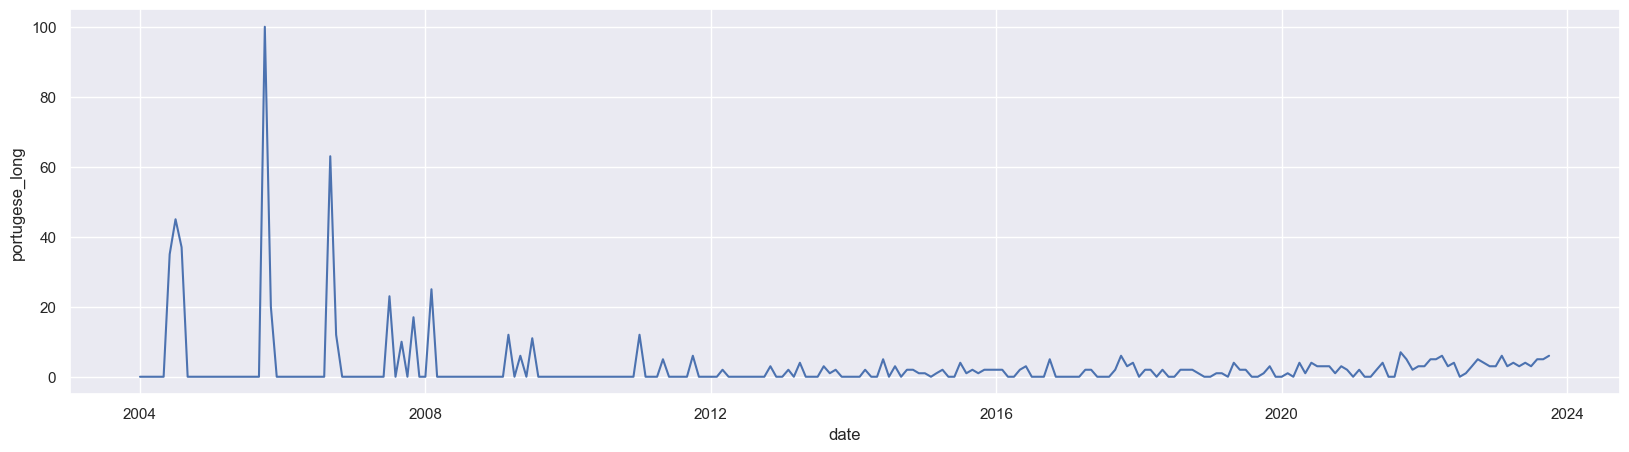

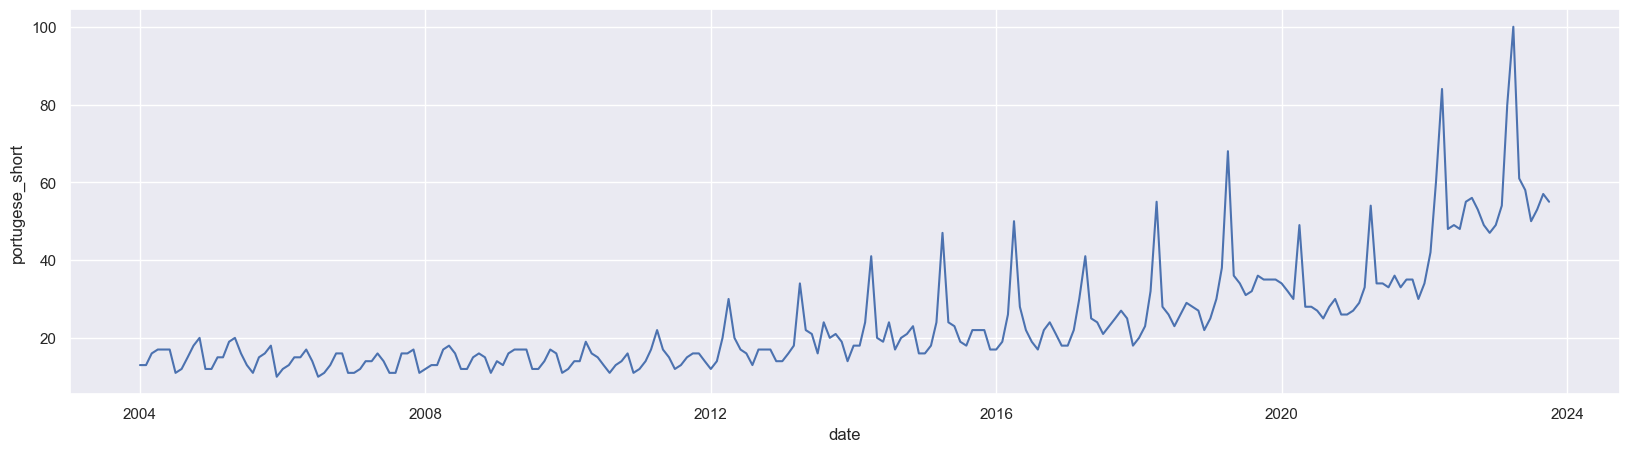

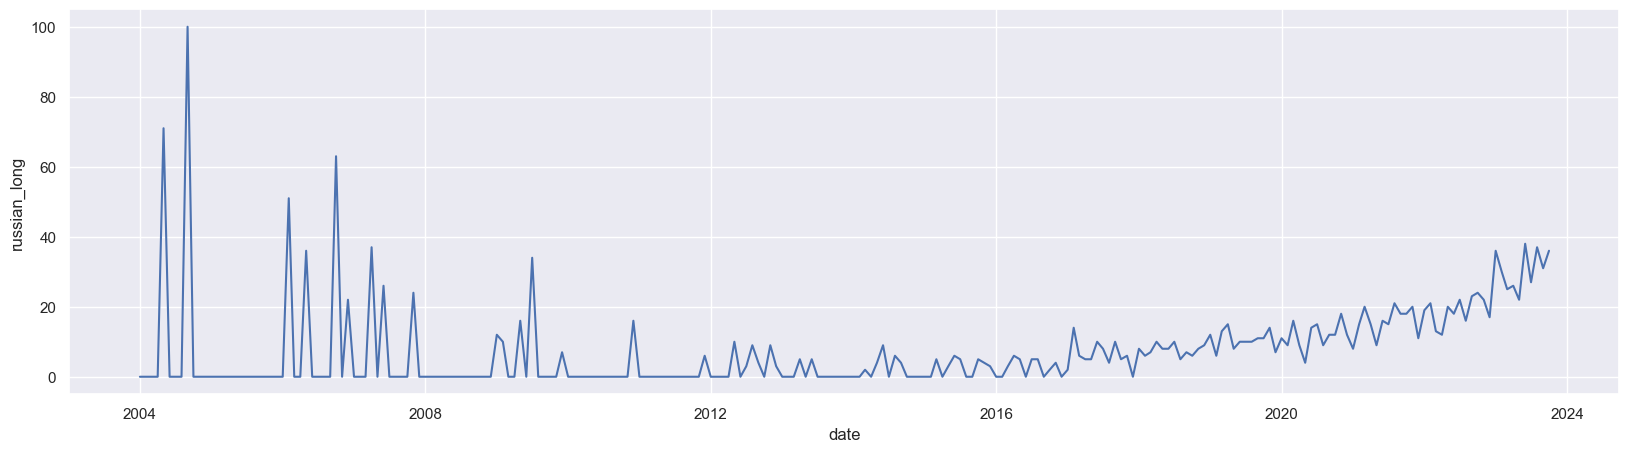

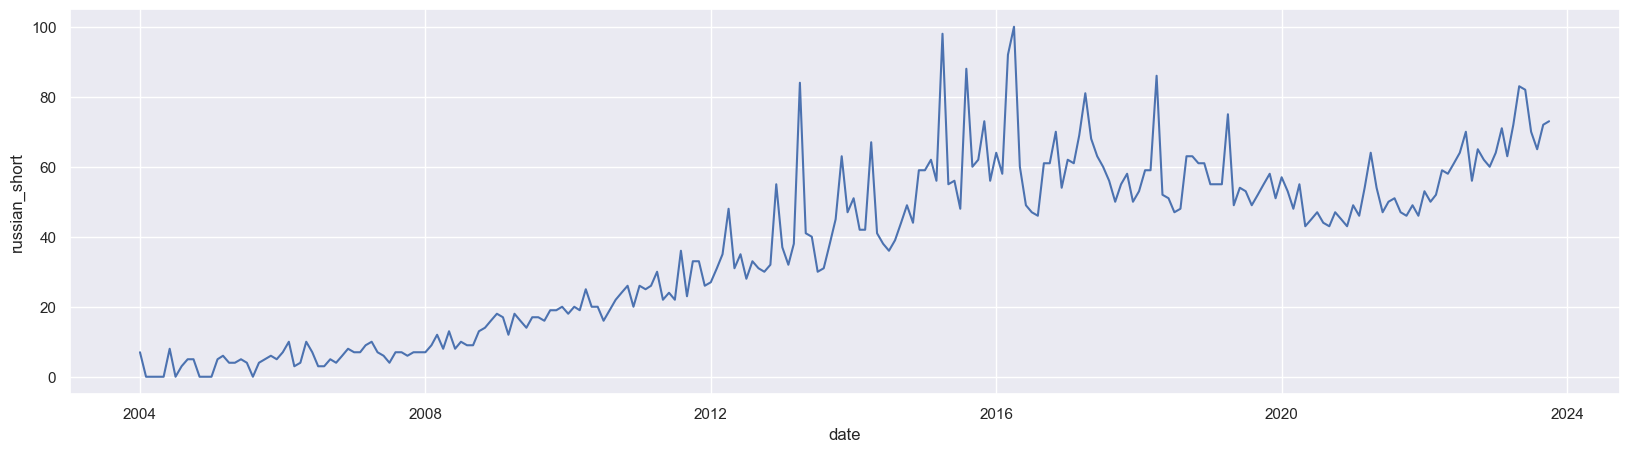

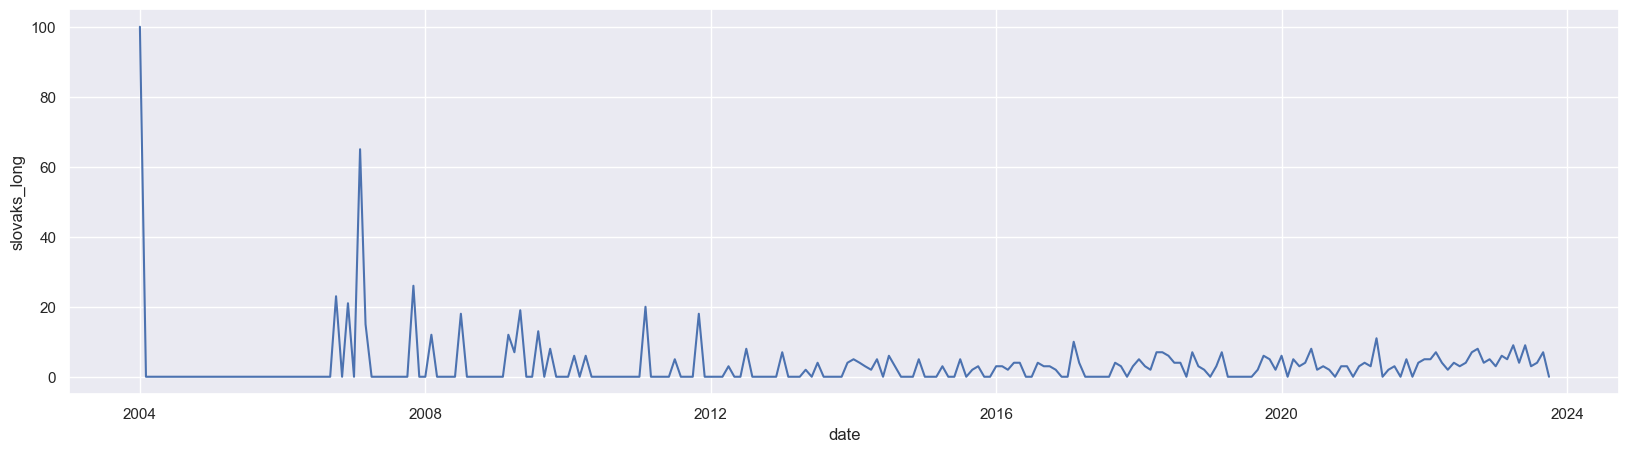

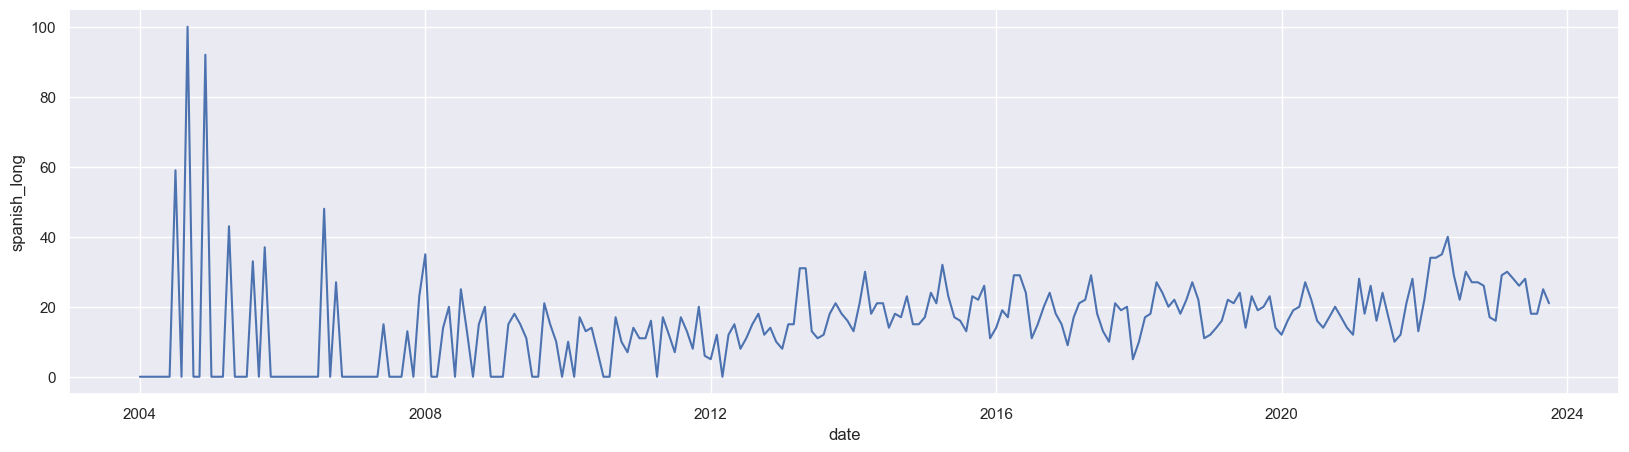

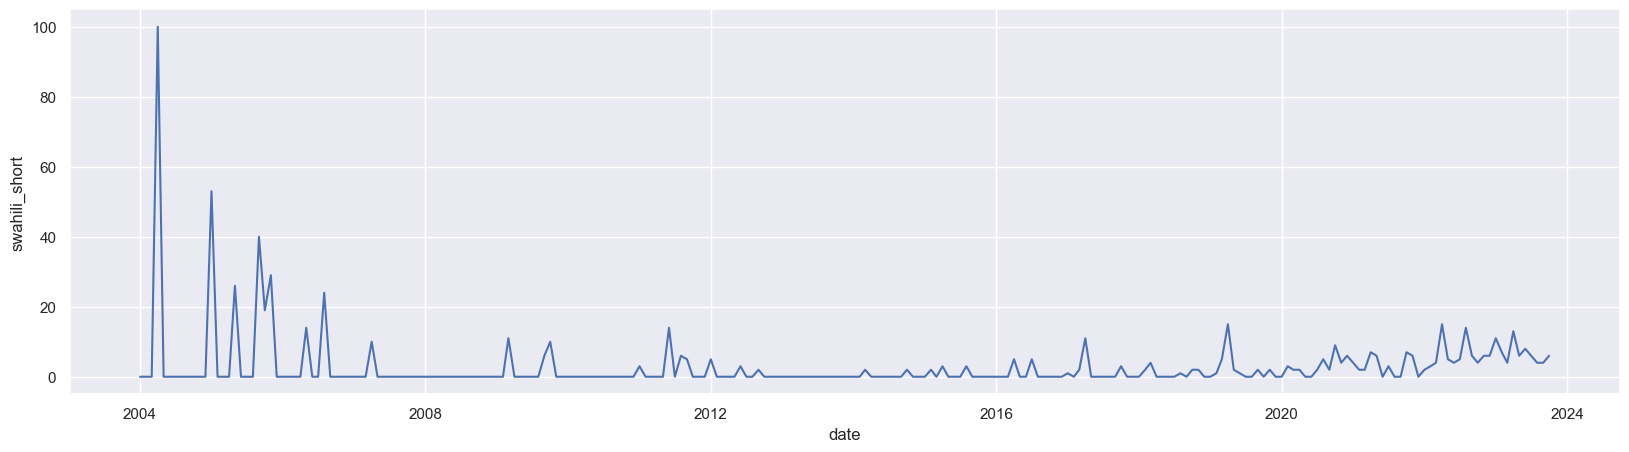

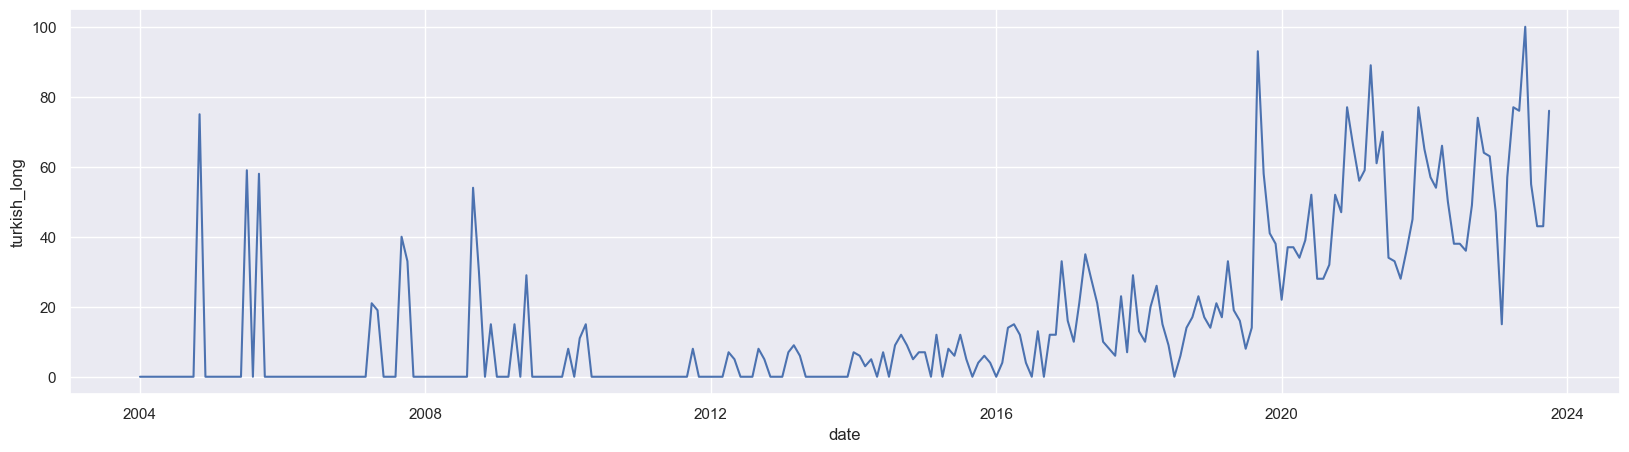

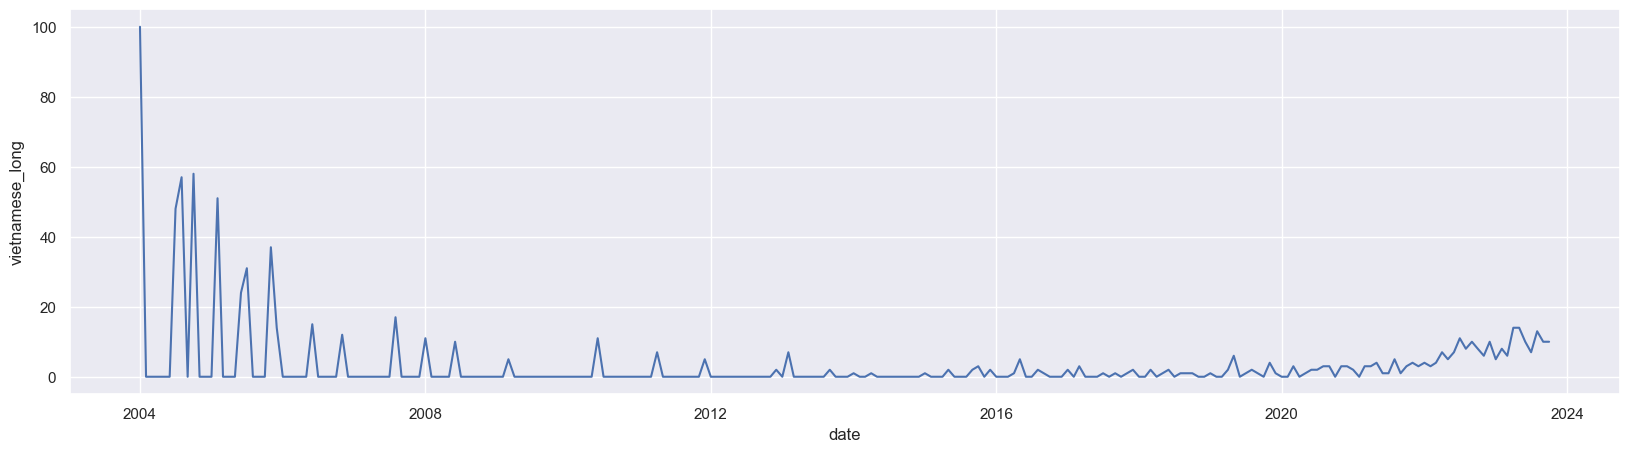

In [19]:
for col in df_lang.columns:
  plt.figure(figsize=(20,5))
  sns.lineplot(x = 'date', y = col, data = df_lang, legend = 'full')
  plt.savefig(str(col))

We can clearly see a distinction between the data in the period 2004-2008, where the interest is usually 0 with huge spikes. While after the 2008 we can rather see non zero interest with gentle spikes and growing trends in some of the countries.


## Mean of RSV for different languages

In [20]:
english = df_lang[['english_short', 'english_long']]
all_languages = df_lang.drop(columns =['english_short', 'english_long'] )

In [21]:
english['avg'] = english.mean(axis=1)
english['std'] = english.std(axis=1)

In [22]:
english.head()

,english_short,english_long,avg,std
date,,,,
2004-01-01,52,16,34.0,18.0
2004-02-01,57,8,32.5,24.5
2004-03-01,57,19,38.0,19.0
2004-04-01,66,19,42.5,23.5
2004-05-01,58,24,41.0,17.0


In [23]:
all_languages['avg'] = all_languages.mean(axis=1)
all_languages['std'] = all_languages.std(axis=1)
all_languages.head()

,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long,avg,std
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0,0,0,0,38,0,0,0,0,59,71,0,0,0,10,75,84,0,36,16,0,13,0,7,100,0,0,0,100,21.000000,33.076713
2004-02-01,0,0,100,0,43,0,56,0,0,68,30,65,0,0,0,0,0,0,0,16,0,13,0,0,0,0,0,0,0,13.482759,26.187152
2004-03-01,98,100,0,0,72,0,0,0,0,62,54,0,0,0,0,100,0,0,0,26,0,16,0,0,0,0,0,0,0,18.206897,33.665064
2004-04-01,75,0,0,0,100,0,0,0,100,51,41,0,0,0,12,0,0,0,0,38,0,17,0,0,0,0,100,0,0,18.413793,33.192767
2004-05-01,0,0,0,0,96,0,0,0,93,57,53,0,0,0,0,0,0,0,0,48,0,17,71,0,0,0,0,0,0,15.000000,29.379796


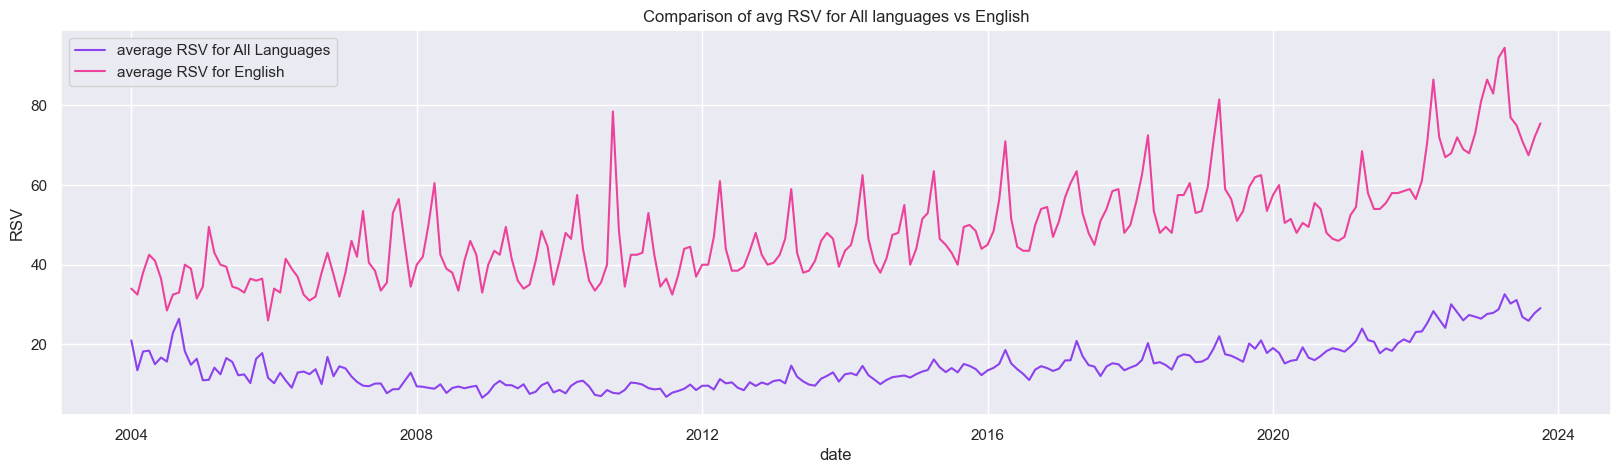

<Figure size 2000x500 with 0 Axes>

In [24]:
plt.clf()
sns.set(rc={'figure.figsize':(20,5)})

short = sns.lineplot(data = all_languages, x= all_languages.index, y = 'avg', color = '#8c42ed',label ='average RSV for All Languages'  )
long = sns.lineplot(data = english, x= english.index, y = 'avg', color = '#ed429b',label = 'average RSV for English'   ).set(ylabel= 'RSV', title = 'Comparison of avg RSV for All languages vs English')


plt.show()
plt.savefig('All languages  vs English')

In [25]:
avg = df_lang.mean(axis=1)

In [26]:
std = df_lang.std(axis=1)

In [27]:
data = {'avg' :avg, 'std': std}
summary_df = pd.concat(data, axis = 1)



In [28]:
summary_df.columns

Index(['avg', 'std'], dtype='object')

In [29]:
summary_df.head()

,avg,std
date,,
2004-01-01,21.838710,33.011207
2004-02-01,14.709677,26.934728
2004-03-01,19.483871,33.823927
2004-04-01,19.967742,33.734734
2004-05-01,16.677419,29.930349


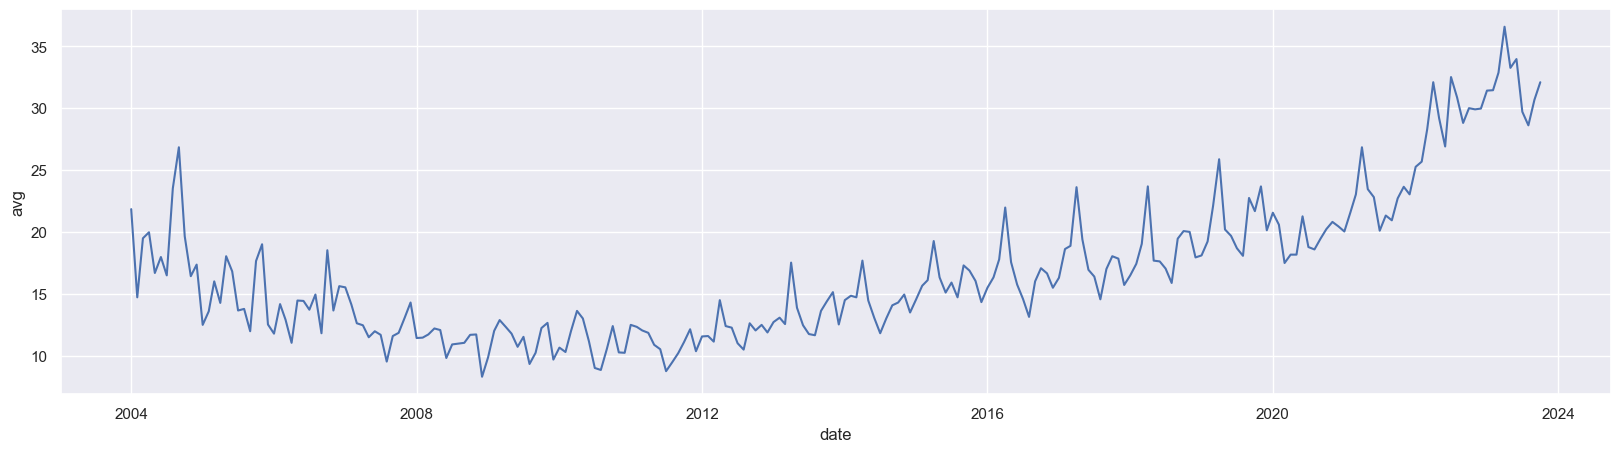

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(x = 'date' , y = 'avg', data = summary_df, legend = 'full')
plt.show()

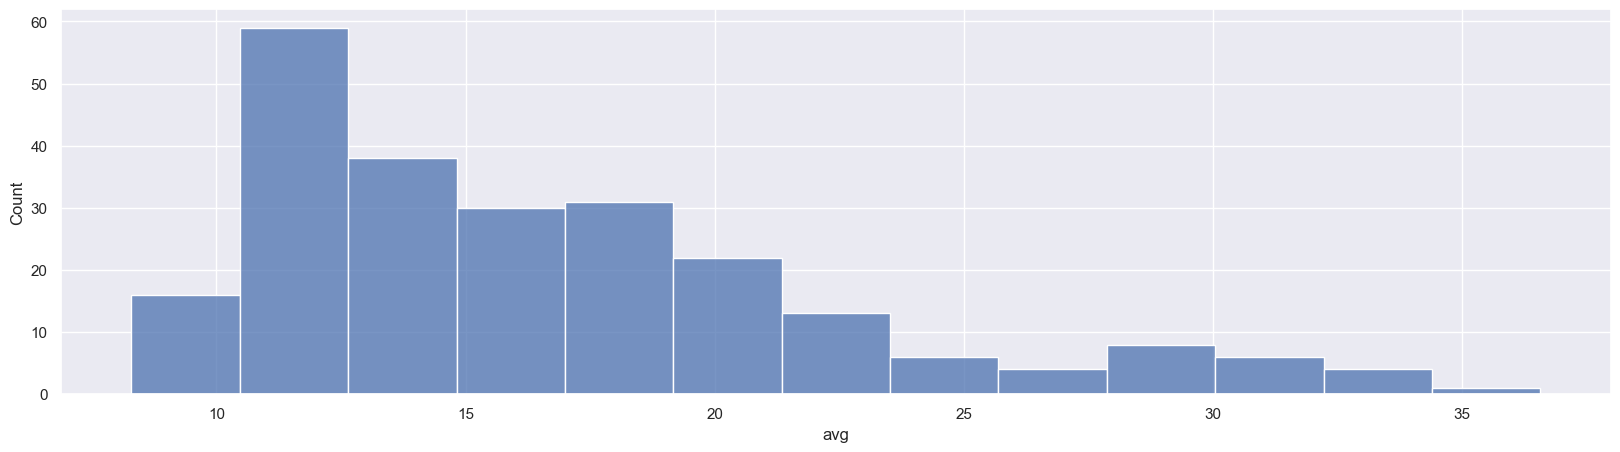

In [31]:
sns.histplot(summary_df['avg'])
plt.show()

In [32]:
avg_perlanguage = df_lang.mean(axis=0)

In [33]:
avg_lang = pd.DataFrame(avg_perlanguage)

In [34]:
avg_lang.head(23)

,0
afrikaans_short,10.155462
arabic_long,15.302521
bulgarian_long,3.151261
chineeshk_long,3.462185
chinees_long,39.903361
czech_long,3.705882
dutch_long,5.306723
english_long,40.941176
english_short,56.731092
finnish_long,3.172269


In [35]:
avg_lang.reset_index(inplace=True)


In [36]:
avg_lang = avg_lang.rename(columns={'index':'language', 0: 'avg'})


In [37]:
avg_lang.columns

Index(['language', 'avg'], dtype='object')

In [38]:
avg_lang.sort_values(by=['avg'], ascending = False,  inplace=True)

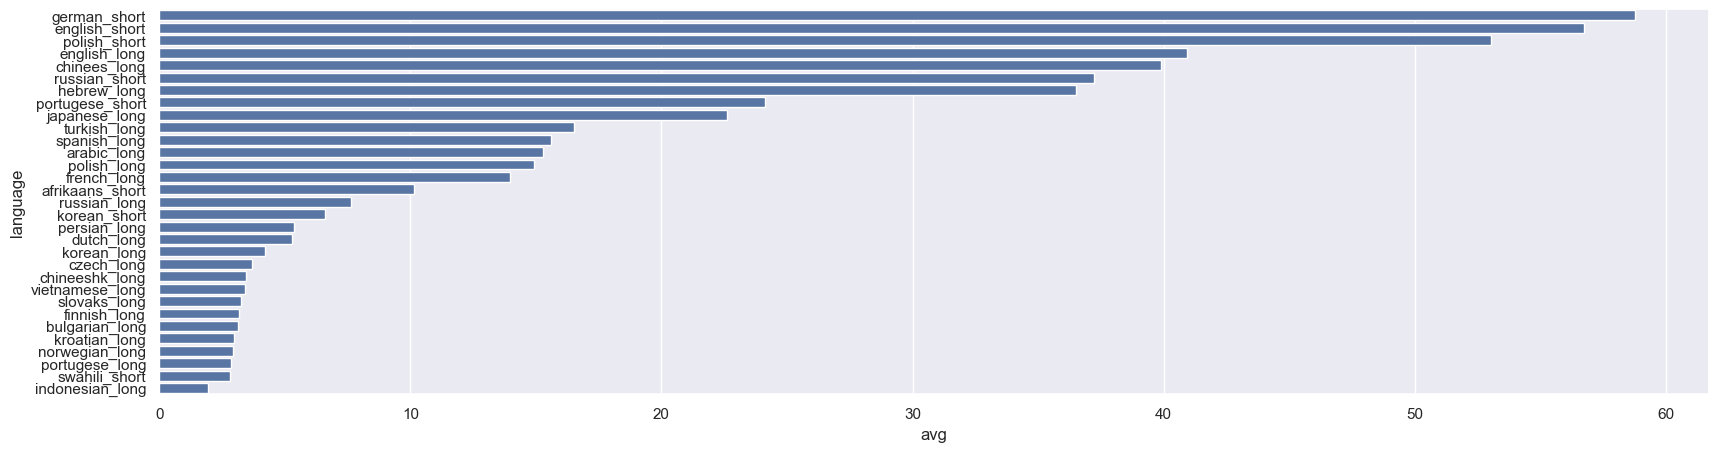

In [39]:
sns.barplot(y= 'language', x = 'avg', data = avg_lang)
plt.show()

## What are the spikes?

In [40]:
df_lang.reset_index(inplace= True)
df_lang.head()

,date,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,english_long,english_short,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long
0,2004-01-01,0,0,0,0,38,0,0,16,52,0,0,59,71,0,0,0,10,75,84,0,36,16,0,13,0,7,100,0,0,0,100
1,2004-02-01,0,0,100,0,43,0,56,8,57,0,0,68,30,65,0,0,0,0,0,0,0,16,0,13,0,0,0,0,0,0,0
2,2004-03-01,98,100,0,0,72,0,0,19,57,0,0,62,54,0,0,0,0,100,0,0,0,26,0,16,0,0,0,0,0,0,0
3,2004-04-01,75,0,0,0,100,0,0,19,66,0,100,51,41,0,0,0,12,0,0,0,0,38,0,17,0,0,0,0,100,0,0
4,2004-05-01,0,0,0,0,96,0,0,24,58,0,93,57,53,0,0,0,0,0,0,0,0,48,0,17,71,0,0,0,0,0,0


In [41]:
df_lang['year']= df_lang['date'].dt.year

In [42]:
df_lang.set_index('date', inplace=True)
df_lang.head()

,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,english_long,english_short,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long,year
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0,0,0,0,38,0,0,16,52,0,0,59,71,0,0,0,10,75,84,0,36,16,0,13,0,7,100,0,0,0,100,2004
2004-02-01,0,0,100,0,43,0,56,8,57,0,0,68,30,65,0,0,0,0,0,0,0,16,0,13,0,0,0,0,0,0,0,2004
2004-03-01,98,100,0,0,72,0,0,19,57,0,0,62,54,0,0,0,0,100,0,0,0,26,0,16,0,0,0,0,0,0,0,2004
2004-04-01,75,0,0,0,100,0,0,19,66,0,100,51,41,0,0,0,12,0,0,0,0,38,0,17,0,0,0,0,100,0,0,2004
2004-05-01,0,0,0,0,96,0,0,24,58,0,93,57,53,0,0,0,0,0,0,0,0,48,0,17,71,0,0,0,0,0,0,2004


In [43]:
autism_yearly = df_lang.groupby('year').mean()
autism_max = df_lang.groupby('year').idxmax()

In [44]:
print(autism_max)

     afrikaans_short arabic_long  ... turkish_long vietnamese_long
year                              ...                             
2004      2004-09-01  2004-03-01  ...   2004-11-01      2004-01-01
2005      2005-08-01  2005-08-01  ...   2005-07-01      2005-02-01
2006      2006-06-01  2006-01-01  ...   2006-01-01      2006-06-01
2007      2007-12-01  2007-07-01  ...   2007-09-01      2007-08-01
2008      2008-03-01  2008-05-01  ...   2008-09-01      2008-01-01
2009      2009-10-01  2009-06-01  ...   2009-06-01      2009-03-01
2010      2010-07-01  2010-05-01  ...   2010-04-01      2010-06-01
2011      2011-03-01  2011-11-01  ...   2011-10-01      2011-04-01
2012      2012-04-01  2012-09-01  ...   2012-09-01      2012-12-01
2013      2013-09-01  2013-05-01  ...   2013-03-01      2013-02-01
2014      2014-04-01  2014-04-01  ...   2014-09-01      2014-01-01
2015      2015-09-01  2015-10-01  ...   2015-03-01      2015-10-01
2016      2016-04-01  2016-10-01  ...   2016-12-01      2016-0

In [45]:
autism_max = pd.DataFrame(autism_max)

In [46]:
autism_max_transposed = autism_max.T
autism_max_transposed.head()

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
afrikaans_short,2004-09-01,2005-08-01,2006-06-01,2007-12-01,2008-03-01,2009-10-01,2010-07-01,2011-03-01,2012-04-01,2013-09-01,2014-04-01,2015-09-01,2016-04-01,2017-08-01,2018-02-01,2019-04-01,2020-11-01,2021-05-01,2022-08-01,2023-08-01
arabic_long,2004-03-01,2005-08-01,2006-01-01,2007-07-01,2008-05-01,2009-06-01,2010-05-01,2011-11-01,2012-09-01,2013-05-01,2014-04-01,2015-10-01,2016-10-01,2017-10-01,2018-09-01,2019-11-01,2020-09-01,2021-10-01,2022-09-01,2023-05-01
bulgarian_long,2004-02-01,2005-03-01,2006-08-01,2007-03-01,2008-08-01,2009-09-01,2010-04-01,2011-08-01,2012-03-01,2013-12-01,2014-06-01,2015-08-01,2016-09-01,2017-09-01,2018-10-01,2019-03-01,2020-02-01,2021-06-01,2022-04-01,2023-10-01
chineeshk_long,2004-06-01,2005-04-01,2006-02-01,2007-12-01,2008-02-01,2009-11-01,2010-06-01,2011-10-01,2012-09-01,2013-02-01,2014-01-01,2015-05-01,2016-02-01,2017-11-01,2018-08-01,2019-05-01,2020-08-01,2021-08-01,2022-07-01,2023-02-01
chinees_long,2004-04-01,2005-06-01,2006-10-01,2007-06-01,2008-02-01,2009-04-01,2010-03-01,2011-06-01,2012-05-01,2013-05-01,2014-05-01,2015-07-01,2016-06-01,2017-04-01,2018-07-01,2019-07-01,2020-06-01,2021-11-01,2022-07-01,2023-02-01


In [47]:
print(autism_max_transposed.columns)

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
           dtype='int64', name='year')


In [48]:

for col in autism_max_transposed.columns:
  print(col)
  print(autism_max_transposed[col].value_counts())

2004
2004-09-01    5
2004-04-01    5
2004-01-01    4
2004-11-01    4
2004-08-01    3
2004-07-01    3
2004-03-01    2
2004-06-01    2
2004-02-01    1
2004-05-01    1
2004-10-01    1
Name: 2004, dtype: int64
2005
2005-02-01    5
2005-01-01    5
2005-08-01    3
2005-03-01    3
2005-04-01    3
2005-05-01    3
2005-06-01    2
2005-12-01    2
2005-10-01    2
2005-07-01    2
2005-11-01    1
Name: 2005, dtype: int64
2006
2006-10-01    7
2006-01-01    4
2006-08-01    4
2006-06-01    3
2006-07-01    3
2006-02-01    2
2006-11-01    2
2006-03-01    2
2006-12-01    1
2006-04-01    1
2006-09-01    1
2006-05-01    1
Name: 2006, dtype: int64
2007
2007-01-01    8
2007-04-01    4
2007-12-01    3
2007-07-01    3
2007-06-01    2
2007-05-01    2
2007-10-01    2
2007-02-01    2
2007-08-01    2
2007-03-01    1
2007-11-01    1
2007-09-01    1
Name: 2007, dtype: int64
2008
2008-01-01    5
2008-03-01    4
2008-08-01    4
2008-05-01    3
2008-02-01    3
2008-09-01    3
2008-04-01    2
2008-07-01    2
2008-12-01 

In [49]:
# lets try to accumulate all days
df_lang.reset_index(inplace= True)
df_lang['month'] = df_lang['date'].dt.month
df_lang.set_index('date', inplace = True)


In [50]:
sum_month = df_lang.groupby('month').sum()
avg_month = df_lang.groupby('month').mean()

In [51]:
print(avg_month)

       afrikaans_short  arabic_long  ...  vietnamese_long    year
month                                ...                         
1             5.550000    13.100000  ...         6.350000  2013.5
2             7.400000    13.550000  ...         3.450000  2013.5
3            14.000000    19.550000  ...         1.300000  2013.5
4            15.950000    14.400000  ...         1.750000  2013.5
5             7.850000    14.850000  ...         1.900000  2013.5
6            12.100000    12.900000  ...         4.100000  2013.5
7             8.400000    14.550000  ...         5.100000  2013.5
8            16.300000    14.500000  ...         5.400000  2013.5
9            12.700000    17.600000  ...         1.600000  2013.5
10            6.200000    17.150000  ...         4.150000  2013.5
11            4.789474    16.421053  ...         3.526316  2013.0
12           10.368421    15.105263  ...         2.210526  2013.0

[12 rows x 32 columns]


In [52]:
no_noise = df_lang['2008-01-01':]

In [53]:
no_noise.head()

,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,english_long,english_short,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long,year,month
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0,0,12,0,24,0,0,24,56,0,0,55,45,0,0,0,2,0,0,0,0,71,0,12,0,7,0,35,0,0,11,2008,1
2008-02-01,0,0,12,13,30,0,10,23,61,10,0,58,36,0,0,0,0,0,0,0,0,43,25,13,0,9,12,0,0,0,0,2008,2
2008-03-01,33,0,0,0,25,0,9,28,72,0,0,54,29,7,0,0,3,0,0,16,17,45,0,13,0,12,0,0,0,0,0,2008,3
2008-04-01,24,4,0,0,27,0,0,34,87,0,13,60,32,0,0,0,2,0,9,0,0,47,0,17,0,8,0,14,0,0,0,2008,4
2008-05-01,23,9,7,0,28,0,0,24,61,19,0,53,49,0,0,0,0,0,0,0,0,50,0,18,0,13,0,20,0,0,0,2008,5


In [54]:
max_months = no_noise.groupby('year').idxmax()
avg_months = no_noise.groupby('month').mean()

In [55]:
avg_months_df = pd.DataFrame(avg_months)
avg_months_df.head()


,afrikaans_short,arabic_long,bulgarian_long,chineeshk_long,chinees_long,czech_long,dutch_long,english_long,english_short,finnish_long,french_long,german_short,hebrew_long,indonesian_long,japanese_long,korean_long,korean_short,kroatian_long,norwegian_long,persian_long,polish_long,polish_short,portugese_long,portugese_short,russian_long,russian_short,slovaks_long,spanish_long,swahili_short,turkish_long,vietnamese_long,year
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6.9375,15.3125,1.1875,1.8125,34.875,4.6250,3.8125,42.9375,54.3750,1.1875,14.3750,63.1875,37.1250,0.9375,21.8125,3.0000,4.7500,1.2500,1.6875,3.2500,18.8125,63.4375,1.3125,20.8750,6.7500,43.7500,2.1250,12.8750,1.6250,16.5625,1.6875,2015.5
2,7.2500,16.9375,1.5000,3.2500,35.625,2.8125,3.8750,45.8125,58.2500,3.1250,16.1875,62.6875,37.5000,0.5625,25.4375,2.8125,4.5625,1.3750,1.8125,5.5625,17.7500,59.1875,2.8750,23.1875,6.9375,43.1875,4.6875,16.0625,1.2500,13.9375,1.1250,2015.5
3,9.6250,17.5000,1.3750,1.6875,37.000,3.4375,5.6875,49.4375,62.6875,2.3125,16.1875,60.8125,31.6875,1.4375,22.2500,2.4375,6.0625,1.6875,1.7500,3.1875,19.8125,60.6250,1.7500,29.6875,6.8750,45.7500,3.1875,17.9375,2.2500,19.6250,1.6250,2015.5
4,13.6875,18.0000,1.3750,2.2500,40.375,2.3750,3.8750,55.1875,76.8125,2.3750,16.5000,61.6250,32.9375,1.0625,27.9375,3.7500,7.0625,1.2500,2.3125,4.5625,19.7500,68.0000,1.3750,45.5000,6.4375,60.6250,3.1875,21.6875,4.4375,26.4375,2.1875,2015.5
5,8.7500,18.5625,1.2500,2.1875,42.375,2.3750,4.1250,44.8750,57.9375,3.5625,16.6250,58.5625,41.0000,0.3750,26.8750,3.8125,6.8125,0.8750,0.9375,3.4375,17.6875,56.0000,1.8750,27.6250,7.1250,44.1250,3.6250,23.0000,1.1875,19.5625,2.3750,2015.5


In [56]:
avg_max = avg_months_df.idxmax()
avg_max_df = pd.DataFrame(avg_max)





[ 0.  2.  4.  6.  8. 10. 12.] [Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4'), Text(6.0, 0, '6'), Text(8.0, 0, '8'), Text(10.0, 0, '10'), Text(12.0, 0, '12')]


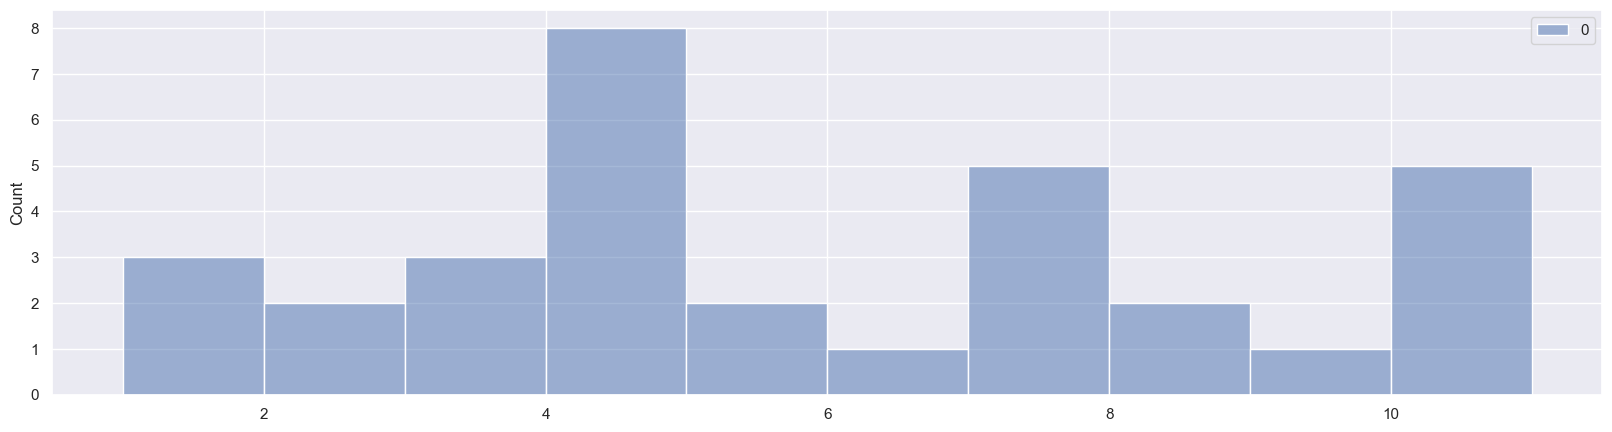

In [57]:
sns.histplot(data = avg_max_df, bins=10)
locs, labels = plt.xticks()
print(locs, labels)

In [58]:
avg_max_df.value_counts()

4     8
7     5
1     3
3     3
11    3
2     2
5     2
8     2
10    2
6     1
9     1
dtype: int64

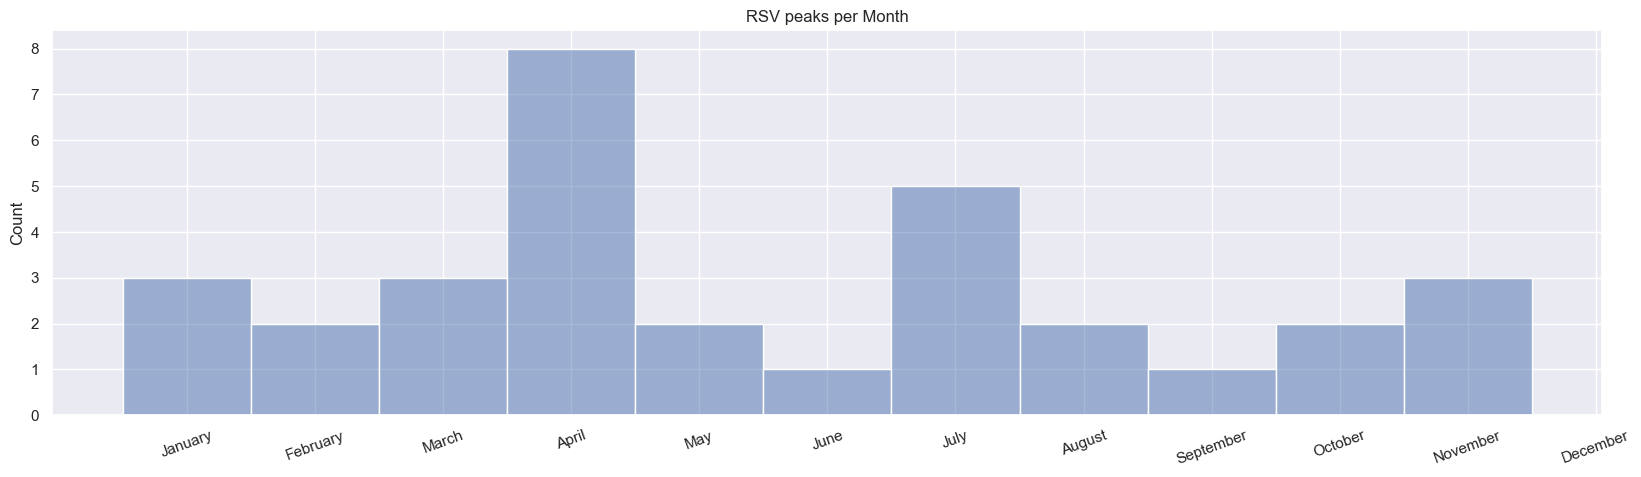

In [59]:
plt.clf()
#sns.set_style("darkgrid")

sns.histplot(data = avg_max_df, discrete= True,  color='#ed429b').set(title = 'RSV peaks per Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)
plt.legend([],[], frameon=False)
plt.show()

In [60]:
for_geo = df_lang.drop(columns = ['month', 'year'])

In [61]:
for_geo.columns.sort_values()

Index(['afrikaans_short', 'arabic_long', 'bulgarian_long', 'chinees_long',
       'chineeshk_long', 'czech_long', 'dutch_long', 'english_long',
       'english_short', 'finnish_long', 'french_long', 'german_short',
       'hebrew_long', 'indonesian_long', 'japanese_long', 'korean_long',
       'korean_short', 'kroatian_long', 'norwegian_long', 'persian_long',
       'polish_long', 'polish_short', 'portugese_long', 'portugese_short',
       'russian_long', 'russian_short', 'slovaks_long', 'spanish_long',
       'swahili_short', 'turkish_long', 'vietnamese_long'],
      dtype='object')

In [62]:
#I will compute avg for languages with both short and long RSV
#and remove short/long from all columns
for_geo['english'] = (for_geo['english_short'] + for_geo['english_long'])//2
for_geo['korean'] = (for_geo['korean_short'] + for_geo['korean_long'])//2
for_geo['polish'] = (for_geo['polish_short'] + for_geo['polish_long'])//2
for_geo['portugese'] = (for_geo['portugese_short'] + for_geo['portugese_long'])//2
for_geo['russian'] = (for_geo['russian_short'] + for_geo['russian_long'])//2
for_geo = for_geo.drop(columns=['english_short', 'english_long','korean_long','korean_short','polish_long', 'polish_short', 'portugese_long', 'portugese_short', 'russian_long', 'russian_short' ])

In [63]:
for colname in for_geo:
  for_geo.rename(columns = {colname: colname.split('_')[0]}, inplace=True)

In [64]:
for_geo.columns

Index(['afrikaans', 'arabic', 'bulgarian', 'chineeshk', 'chinees', 'czech',
       'dutch', 'finnish', 'french', 'german', 'hebrew', 'indonesian',
       'japanese', 'kroatian', 'norwegian', 'persian', 'slovaks', 'spanish',
       'swahili', 'turkish', 'vietnamese', 'english', 'korean', 'polish',
       'portugese', 'russian'],
      dtype='object')

In [65]:
for_geo.to_csv('rsv_languages.csv')

In [66]:
for_geo.dtypes

afrikaans     int64
arabic        int64
bulgarian     int64
chineeshk     int64
chinees       int64
czech         int64
dutch         int64
finnish       int64
french        int64
german        int64
hebrew        int64
indonesian    int64
japanese      int64
kroatian      int64
norwegian     int64
persian       int64
slovaks       int64
spanish       int64
swahili       int64
turkish       int64
vietnamese    int64
english       int64
korean        int64
polish        int64
portugese     int64
russian       int64
dtype: object

In [67]:
for_geo.head()

,afrikaans,arabic,bulgarian,chineeshk,chinees,czech,dutch,finnish,french,german,hebrew,indonesian,japanese,kroatian,norwegian,persian,slovaks,spanish,swahili,turkish,vietnamese,english,korean,polish,portugese,russian
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-01-01,0,0,0,0,38,0,0,0,0,59,71,0,0,75,84,0,100,0,0,0,100,34,5,26,6,3
2004-02-01,0,0,100,0,43,0,56,0,0,68,30,65,0,0,0,0,0,0,0,0,0,32,0,8,6,0
2004-03-01,98,100,0,0,72,0,0,0,0,62,54,0,0,100,0,0,0,0,0,0,0,38,0,13,8,0
2004-04-01,75,0,0,0,100,0,0,0,100,51,41,0,0,0,0,0,0,0,100,0,0,42,6,19,8,0
2004-05-01,0,0,0,0,96,0,0,0,93,57,53,0,0,0,0,0,0,0,0,0,0,41,0,24,8,35


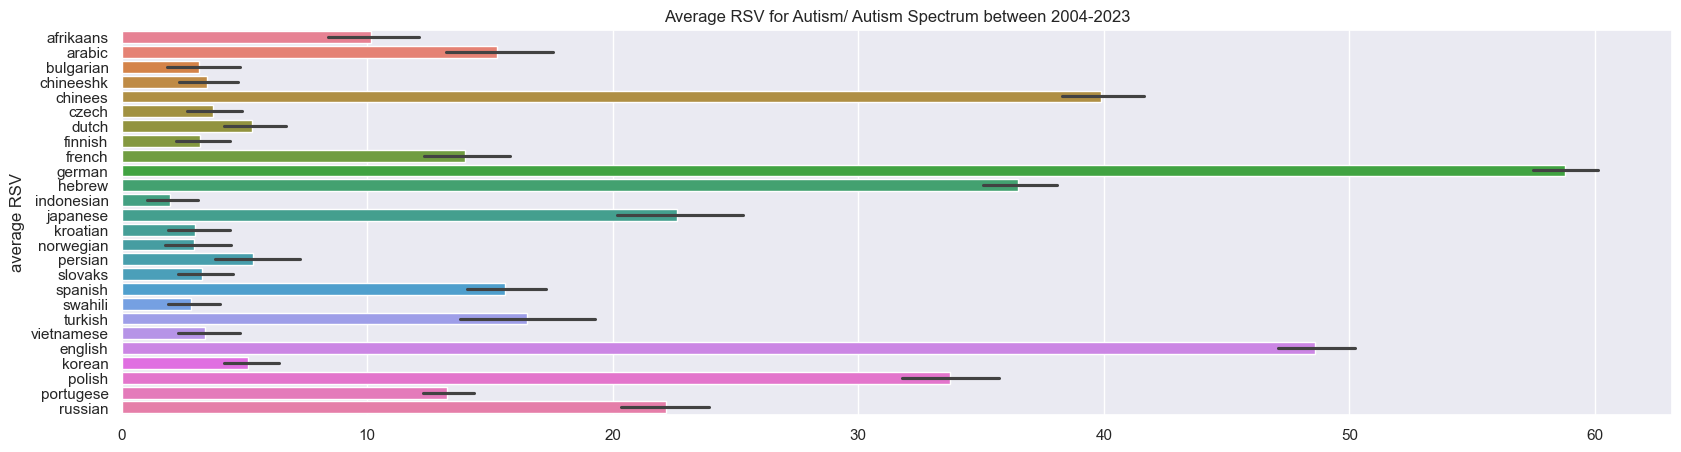

In [68]:
sns.barplot(data = for_geo, orient = 'h').set(ylabel = 'average RSV', title= 'Average RSV for Autism/ Autism Spectrum between 2004-2023')
plt.show()

In [69]:
sorted_mean = for_geo.mean(axis=0)
sorted_mean.head()

afrikaans    10.155462
arabic       15.302521
bulgarian     3.151261
chineeshk     3.462185
chinees      39.903361
dtype: float64

In [70]:
sorted_mean = pd.DataFrame(sorted_mean, columns=['mean'])


In [71]:
sorted_mean.reset_index((None), inplace=True)

In [72]:
sorted_mean.sort_values('mean', inplace=True)

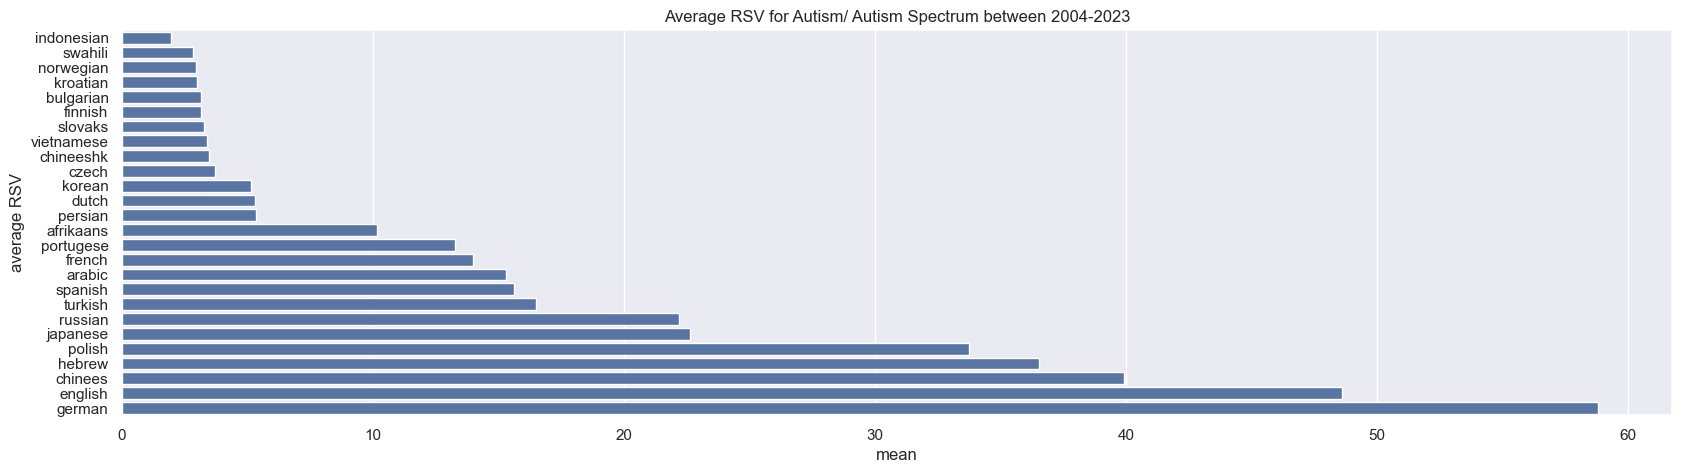

In [73]:
sns.barplot(data = sorted_mean,x='mean', y='index', orient = 'h').set(ylabel = 'average RSV', title= 'Average RSV for Autism/ Autism Spectrum between 2004-2023')
plt.show()

## Languages vs Countries

In [76]:
#do the same for countries
countries=  pd.read_csv('rsv_countries.csv')

In [77]:
countries.columns.sort_values()

Index(['Unnamed: 0', 'afrikaans_short_geoMap', 'arabic_long_geoMap',
       'bulgarian_long_geoMap', 'chinees_long_geoMap', 'chineeshk_long_geoMap',
       'code', 'country', 'czech_long_geoMap', 'dutch_long_geoMap',
       'english_long_geoMap', 'english_short_geoMap', 'finnish_long_geoMap',
       'french_long_geoMap', 'german_short_geoMap', 'hebrew_long_geoMap',
       'indonesian_long_geoMap', 'japanese_long_geoMap', 'korean_long_geoMap',
       'korean_short_geoMap', 'kroatian_long_geoMap', 'norwegian_long_geoMap',
       'persian_long_geoMap', 'polish_long_geoMap', 'polish_short_geoMap',
       'portugese_long_geoMap', 'portugese_short_geoMap',
       'russian_long_geoMap', 'russian_short_geoMap', 'slovaks_long_geoMap',
       'spanish_long_geoMap', 'swahili_short_geoMap', 'turkish_long_geoMap',
       'vietnamese_long_geoMap'],
      dtype='object')

In [78]:
countries.set_index(['country', 'code'], inplace=True)


In [79]:
countries.drop(columns=['Unnamed: 0'], inplace=True)

In [80]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 101 entries, ('South Africa', 'ZAF') to ('Vietnam', 'VNM')
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   afrikaans_short_geoMap  101 non-null    float64
 1   german_short_geoMap     101 non-null    object 
 2   portugese_long_geoMap   101 non-null    float64
 3   arabic_long_geoMap      101 non-null    float64
 4   hebrew_long_geoMap      101 non-null    object 
 5   portugese_short_geoMap  101 non-null    object 
 6   bulgarian_long_geoMap   101 non-null    float64
 7   indonesian_long_geoMap  101 non-null    float64
 8   russian_long_geoMap     101 non-null    float64
 9   chineeshk_long_geoMap   101 non-null    float64
 10  japanese_long_geoMap    101 non-null    float64
 11  russian_short_geoMap    101 non-null    object 
 12  chinees_long_geoMap     101 non-null    object 
 13  korean_long_geoMap      101 non-null    object 
 14  czech

In [81]:
# I cant convert to numeric because some of the data point are strings "<1"

for col in countries.columns:
  countries[countries[col]=='<1']=1


In [83]:
for col in countries.columns:
  print(countries[col].value_counts())

0.0      88
1.0      12
100.0     1
Name: afrikaans_short_geoMap, dtype: int64
0     83
1     12
1      2
38     1
4      1
78     1
75     1
Name: german_short_geoMap, dtype: int64
0.0      88
1.0      12
100.0     1
Name: portugese_long_geoMap, dtype: int64
0.0      72
1.0      12
37.0      1
74.0      1
63.0      1
54.0      1
100.0     1
28.0      1
89.0      1
6.0       1
23.0      1
35.0      1
42.0      1
22.0      1
38.0      1
66.0      1
18.0      1
41.0      1
67.0      1
Name: arabic_long_geoMap, dtype: int64
0      87
1      12
100     1
15      1
Name: hebrew_long_geoMap, dtype: int64
0      67
1      12
54      3
52      2
50      2
63      1
66      1
100     1
64      1
82      1
60      1
58      1
57      1
43      1
46      1
80      1
40      1
3       1
55      1
45      1
Name: portugese_short_geoMap, dtype: int64
0.0      88
1.0      12
100.0     1
Name: bulgarian_long_geoMap, dtype: int64
0.0      88
1.0      12
100.0     1
Name: indonesian_long_geoMap, dtype: 

In [84]:
countries = countries.astype('float64')

In [85]:
countries.dtypes

afrikaans_short_geoMap    float64
german_short_geoMap       float64
portugese_long_geoMap     float64
arabic_long_geoMap        float64
hebrew_long_geoMap        float64
portugese_short_geoMap    float64
bulgarian_long_geoMap     float64
indonesian_long_geoMap    float64
russian_long_geoMap       float64
chineeshk_long_geoMap     float64
japanese_long_geoMap      float64
russian_short_geoMap      float64
chinees_long_geoMap       float64
korean_long_geoMap        float64
czech_long_geoMap         float64
korean_short_geoMap       float64
slovaks_long_geoMap       float64
dutch_long_geoMap         float64
kroatian_long_geoMap      float64
spanish_long_geoMap       float64
english_long_geoMap       float64
norwegian_long_geoMap     float64
swahili_short_geoMap      float64
english_short_geoMap      float64
persian_long_geoMap       float64
turkish_long_geoMap       float64
finnish_long_geoMap       float64
polish_long_geoMap        float64
vietnamese_long_geoMap    float64
french_long_ge

In [86]:
countries['english'] = (countries['english_short_geoMap'] + countries['english_long_geoMap'])//2
countries['korean'] = (countries['korean_short_geoMap'] + countries['korean_long_geoMap'])//2
countries['polish'] = (countries['polish_short_geoMap'] + countries['polish_long_geoMap'])//2
countries['portugese'] = (countries['portugese_short_geoMap'] + countries['portugese_long_geoMap'])//2
countries['russian'] = (countries['russian_short_geoMap'] + countries['russian_long_geoMap'])//2

In [87]:
countries.drop(columns=['english_short_geoMap', 'english_long_geoMap','korean_short_geoMap','korean_long_geoMap', 'polish_short_geoMap','polish_long_geoMap','portugese_short_geoMap','portugese_long_geoMap','russian_short_geoMap', 'russian_long_geoMap'], inplace=True)

In [88]:
for colname in countries:
  countries.rename(columns = {colname: colname.split('_')[0]}, inplace=True)

In [89]:
countries.head()

,,afrikaans,german,arabic,hebrew,bulgarian,indonesian,chineeshk,japanese,chinees,czech,slovaks,dutch,kroatian,spanish,norwegian,swahili,persian,turkish,finnish,vietnamese,french,english,korean,polish,portugese,russian
country,code,,,,,,,,,,,,,,,,,,,,,,,,,,
South Africa,ZAF,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0
Turkmenistan,TKM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0
Luxembourg,LUX,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Netherlands,NLD,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
Belgium,BEL,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,6.0,0.0,0.0,0.0,0.0


In [96]:
countries.set_index('country', inplace=True)

In [91]:
countries.columns

Index(['afrikaans', 'german', 'arabic', 'hebrew', 'bulgarian', 'indonesian',
       'chineeshk', 'japanese', 'chinees', 'czech', 'slovaks', 'dutch',
       'kroatian', 'spanish', 'norwegian', 'swahili', 'persian', 'turkish',
       'finnish', 'vietnamese', 'french', 'english', 'korean', 'polish',
       'portugese', 'russian'],
      dtype='object')

<AxesSubplot: xlabel='country,code'>

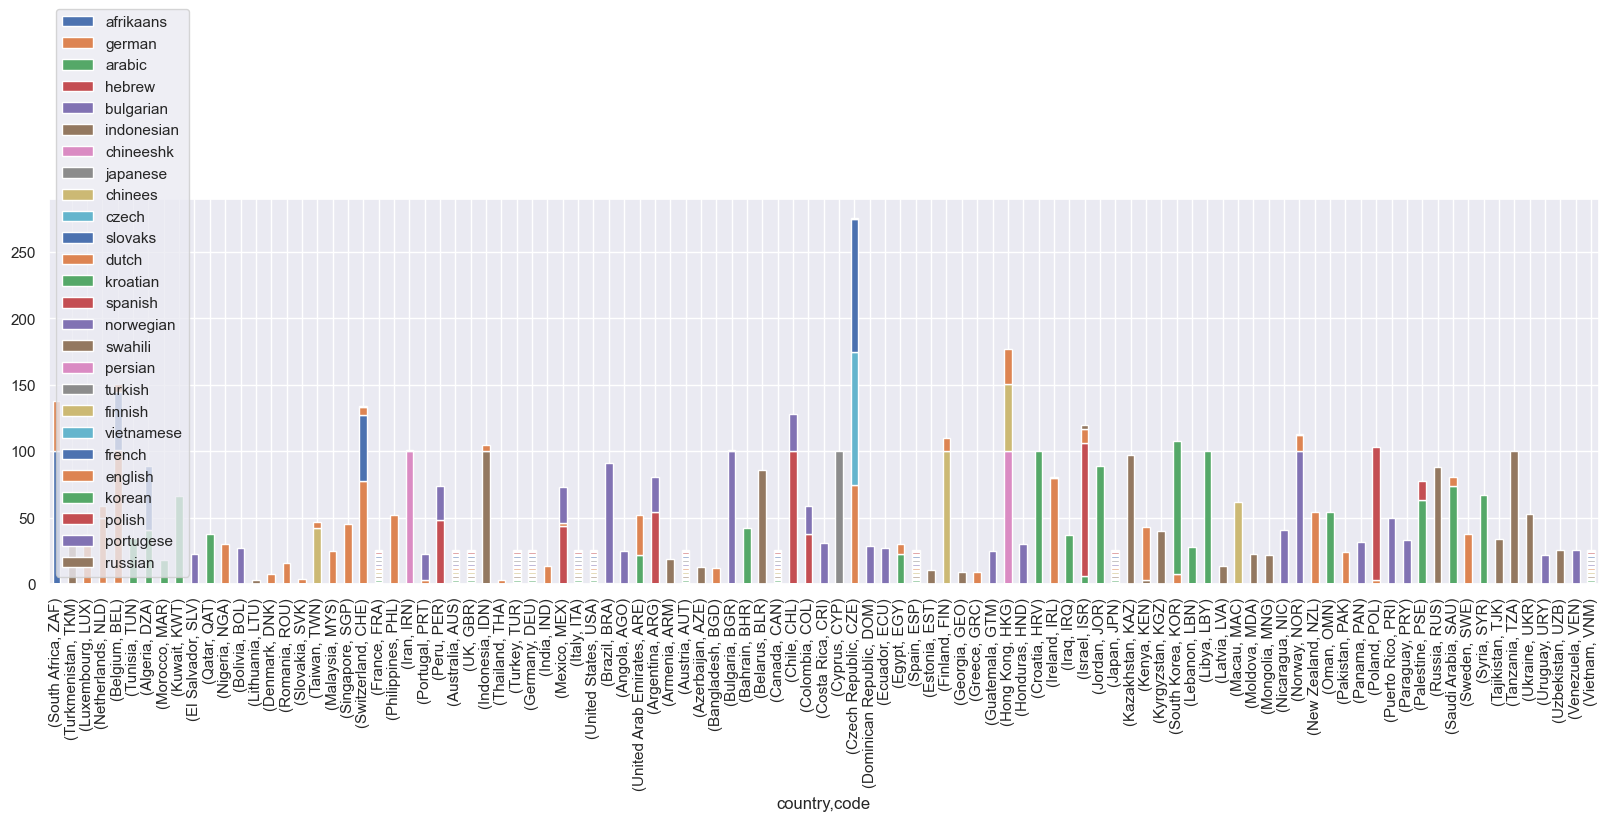

In [92]:
countries.plot(kind='bar', stacked=True)

In [93]:
countries.to_csv('cleaned_countries.csv')

Created a long form frame but don't need it now


In [94]:
countries.reset_index(level=0, inplace=True)

In [95]:
long_countries = pd.melt(countries, id_vars='country', value_vars=['afrikaans', 'german', 'arabic', 'hebrew', 'bulgarian',
       'indonesian', 'chineeshk', 'japanese', 'chinees', 'czech', 'slovaks',
       'dutch', 'kroatian', 'spanish', 'norwegian', 'swahili', 'persian',
       'turkish', 'finnish', 'vietnamese', 'french', 'english', 'korean',
       'polish', 'portugese', 'russian'], var_name = 'language', value_name='proportion')

In [ ]:
agg_countries = long_countries.groupby(['country', 'language'])['proportion'].sum()

In [ ]:
mask = long_countries['proportion']==0
long_countries = long_countries[~mask]

In [ ]:
long_countries.head()